In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [3]:
cond='na'
path='E:\\jesyin\\SIN attention\\ML\\'

In [4]:
datapaths=[path]
files=[]
while datapaths:
    # paths.pop() gets top of directory stack to process
    # os.scandir is easier and more efficient than os.listdir,
    # though it must be closed (but with statement does this for us)
    with os.scandir(datapaths.pop()) as entries:
        for entry in entries:  # loop through the folder
            #print(entry.name)  # print text to keep track the process
            if entry.name.endswith(cond+'_sffr.pkl'):
                files.append(entry.path)

In [5]:
len(files)

20

## Sub, source FFRs and ground truth

In [29]:
lo_df=pd.DataFrame([])
hi_df=pd.DataFrame([])
sub_list=[]

for n in range(len(files)):
    f =open(files[n],'rb')
    sffr_data=pickle.load(f)
    
    subject = files[n].split('\\')[-1].split('_')[0]
    sub=re.findall(r'\d+',subject)
    sub=int(sub[0])
    sub_list.append(sub)
    
    # df for low-alpha-indexed sffr
    # ah
    lo_ah=pd.DataFrame(sffr_data['ah_lo']['sffr'])
    lo_ah=lo_ah.T
    lo_ah['Sub']=sub
    lo_ah['Token']=1 #'a'
    lo_df=lo_df.append(lo_ah)
    # ee
    lo_ee=pd.DataFrame(sffr_data['ee_lo']['sffr'])
    lo_ee=lo_ee.T
    lo_ee['Sub']=sub
    lo_ee['Token']=2 #'i'
    lo_df=lo_df.append(lo_ee)
    # uu
    #lo_uu=pd.DataFrame(sffr_data['uu']['sffr'])
    #lo_uu=lo_uu.T
    #lo_uu['Sub']=sub
    #lo_uu['Token']=3 #'u'
    #lo_df=lo_df.append(lo_uu)
        

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/813401723.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lo_df=lo_df.append(lo_ah)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/813401723.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lo_df=lo_df.append(lo_ee)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/813401723.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lo_df=lo_df.append(lo_ah)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/813401723.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lo_df=lo_df.append(lo_ee)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/813401723.py:20: FutureWarning: The frame.a

In [30]:
for n in range(len(files)):
    f =open(files[n],'rb')
    sffr_data=pickle.load(f)
    
    subject = files[n].split('\\')[-1].split('_')[0]
    sub=re.findall(r'\d+',subject)
    sub=int(sub[0])
    
    # df for low-alpha-indexed sffr
    # ah
    hi_ah=pd.DataFrame(sffr_data['ah_hi']['sffr'])
    hi_ah=hi_ah.T
    hi_ah['Sub']=sub
    hi_ah['Token']=1 #'a'
    hi_df=hi_df.append(hi_ah)
    # ee
    hi_ee=pd.DataFrame(sffr_data['ee_hi']['sffr'])
    hi_ee=hi_ee.T
    hi_ee['Sub']=sub
    hi_ee['Token']=2 #'i'
    hi_df=hi_df.append(hi_ee)
    
    # uu
    #hi_uu=pd.DataFrame(sffr_data['uu']['sffr'])
    #hi_uu=hi_uu.T
    #hi_uu['Sub']=sub
    #hi_uu['Token']=3 # 'u'
    #hi_df=hi_df.append(hi_uu)

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/1189964757.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hi_df=hi_df.append(hi_ah)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/1189964757.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hi_df=hi_df.append(hi_ee)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/1189964757.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hi_df=hi_df.append(hi_ah)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/1189964757.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hi_df=hi_df.append(hi_ee)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/1189964757.py:15: FutureWarning: The fr

In [31]:
lo_df=lo_df.set_index('Sub')
hi_df=hi_df.set_index('Sub')

In [32]:
len(lo_df[lo_df['Token']==2])

20

In [33]:
hi_df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,Token
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,7.172359e-07,8.317217e-07,5.619269e-07,3.061125e-07,6.774756e-08,-2.849888e-07,-3.990237e-07,-3.269116e-07,-4.050132e-07,-3.078509e-07,1.641600e-08,-3.366561e-08,-2.935093e-07,-2.261762e-07,-1.654072e-07,-3.538762e-07,-3.314399e-07,-1.138373e-07,-2.101923e-07,-4.467681e-07,-2.188933e-07,3.208482e-07,4.531843e-07,1.191320e-07,-6.403971e-08,1.102758e-07,2.542302e-07,1.349573e-07,-5.163640e-08,-8.531877e-08,-4.659739e-09,1.598285e-07,5.069729e-07,8.731474e-07,9.064481e-07,6.041367e-07,2.388221e-07,-2.826346e-08,-2.071271e-07,-3.794859e-07,-4.657355e-07,-3.094158e-07,-1.565598e-07,-2.840216e-07,-3.641782e-07,-2.229579e-07,-2.542843e-07,-3.858583e-07,-2.177789e-07,-2.032351e-08,...,7.815992e-07,9.076985e-07,7.452472e-07,4.775962e-07,8.672731e-08,-3.629255e-07,-5.923026e-07,-5.566558e-07,-6.491911e-07,-8.312778e-07,-6.207004e-07,-3.495406e-07,-4.766457e-07,-4.922826e-07,-2.525942e-07,-2.624249e-07,-3.745122e-07,-2.990500e-07,-1.316280e-07,1.321441e-07,2.664875e-07,1.325996e-07,1.944490e-07,3.657714e-07,2.076605e-07,1.606174e-07,3.826411e-07,2.975051e-07,5.988149e-08,-3.406109e-08,-2.240111e-07,-1.598002e-07,3.405431e-07,4.524722e-07,1.926522e-07,3.314206e-07,4.580009e-07,1.011765e-07,-6.155179e-08,1.216242e-07,5.535014e-08,-8.098109e-08,5.660430e-08,1.080816e-07,5.901031e-08,2.369983e-07,2.730951e-07,-1.086264e-07,-3.786223e-07,1
10,-1.240661e-07,-3.195371e-07,-1.947850e-07,-2.661819e-07,-5.587592e-07,-4.678256e-07,-1.996816e-07,-1.352278e-07,-1.182460e-09,1.214185e-07,-1.895888e-08,-4.494034e-08,9.662216e-08,-1.285923e-08,-1.372638e-07,1.526063e-08,6.364328e-08,4.717176e-09,1.692044e-07,2.682570e-07,1.566773e-07,1.464547e-07,1.053531e-07,-2.980293e-08,4.906377e-08,1.267857e-07,-2.291944e-09,-5.480482e-08,-8.160092e-08,-1.469156e-07,-7.576638e-08,-1.040885e-07,-1.989895e-07,3.375319e-08,2.359435e-07,1.293282e-07,1.673791e-07,3.050084e-07,2.803010e-07,3.478513e-07,3.541422e-07,-1.435540e-08,-2.703348e-07,-1.256945e-07,-8.256232e-08,-2.797752e-07,-3.666149e-07,-3.357632e-07,-2.810125e-07,-9.827224e-08,...,-2.555425e-07,-1.509235e-07,3.615831e-07,5.462668e-07,4.186487e-07,4.787178e-07,5.004650e-07,3.032721e-07,2.052748e-07,1.715223e-07,8.053468e-09,-1.177521e-07,-1.466933e-07,-2.074481e-07,-2.675927e-07,-2.747985e-07,-1.847158e-07,-2.433685e-09,2.994700e-08,-1.205757e-07,-1.398635e-07,-3.685659e-10,7.541196e-08,-2.717695e-08,-2.967221e-07,-4.391553e-07,-3.007316e-07,-2.344439e-07,-2.447484e-07,-2.100082e-08,1.725709e-07,1.881973e-07,3.775297e-07,5.914469e-07,5.176520e-07,4.348230e-07,4.486162e-07,2.836856e-07,1.023672e-07,2.324878e-07,3.432391e-07,1.163618e-09,-3.953982e-07,-3.637703e-07,-2.696875e-07,-4.197108e-07,-5.104998e-07,-5.159971e-07,-6.074751e-07,2
11,-2.872218e-08,-9.576479e-08,-2.276324e-07,-1.886577e-07,-5.252801e-08,-4.219282e-08,5.031814e-08,3.123444e-07,4.366730e-07,3.151538e-07,1.660513e-07,1.545135e-07,2.151465e-07,1.905299e-07,1.106188e-07,1.333081e-07,2.059726e-07,1.506198e-07,-2.924393e-08,-1.738422e-07,-2.144543e-07,-3.093228e-07,-4.513227e-07,-3.394969e-07,-2.172976e-07,-5.791057e-07,-8.726284e-07,-5.612608e-07,-3.899248e-07,-6.186781e-07,-4.689285e-07,-1.710302e-08,2.670616e-07,6.828182e-07,1.050688e-06,8.526296e-07,6.057547e-07,6.442992e-07,4.636876e-07,2.274516e-07,2.743518e-07,1.797397e-07,-5.484901e-09,1.369251e-07,2.743343e-07,1.846491e-07,9.841092e-08,-9.948575e-08,-3.826687e-07,-3.841462e-07,...,1.596371e-07,5.448404e-07,9.126168e-07,8.417971e-07,4.771329e-07,2.909180e-07,3.227018e-07,3.996253e-07,3.736199e-07,2.356347e-07,1.892694e-07,2.156817e-07,9.731229e-

In [34]:
lo_df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,Token
Sub,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,3.326175e-07,4.037275e-07,5.471111e-08,-2.292712e-07,-1.259006e-07,-6.155786e-08,-2.796619e-07,-5.000512e-07,-5.571515e-07,-5.049035e-07,-4.864225e-07,-5.523021e-07,-4.409283e-07,-1.511092e-07,-1.246903e-07,-2.224691e-07,9.687209e-08,4.572667e-07,2.168643e-07,-8.876184e-08,2.196715e-07,5.443826e-07,2.702327e-07,-3.837132e-08,7.309606e-08,2.077229e-07,1.889487e-07,2.828396e-07,5.030352e-07,5.836943e-07,3.380222e-07,3.568806e-08,1.860768e-07,6.091885e-07,7.399537e-07,6.496043e-07,5.060586e-07,1.216215e-07,-3.535372e-07,-6.354465e-07,-7.545692e-07,-6.979510e-07,-5.488714e-07,-5.598049e-07,-6.518783e-07,-5.833693e-07,-3.690099e-07,-2.678524e-07,-4.616915e-07,-6.004655e-07,...,6.096592e-07,7.540985e-07,7.064323e-07,2.690169e-07,1.559478e-08,1.250350e-07,-1.021354e-07,-6.200140e-07,-6.628826e-07,-2.532134e-07,5.479928e-08,1.000716e-07,8.799867e-09,-3.634413e-08,2.517147e-08,-8.687443e-08,-4.577328e-07,-5.796436e-07,-2.712938e-07,-1.173121e-07,-2.456691e-07,-3.042966e-08,4.378329e-07,4.058378e-07,1.171587e-07,2.705365e-07,4.103020e-07,3.009827e-08,-2.074510e-07,5.478790e-08,2.299087e-07,1.319493e-07,8.566540e-08,1.206095e-07,1.195959e-07,1.077662e-07,1.377001e-07,1.616814e-07,3.683189e-08,-1.921475e-07,-3.014634e-07,-3.190458e-07,-3.183457e-07,-6.975758e-08,3.421861e-07,3.386438e-07,-4.401783e-08,-1.276168e-07,1.889624e-08,1
10,-5.007672e-08,3.606999e-07,4.896065e-07,3.885675e-07,3.532192e-07,3.214137e-07,1.794503e-07,-3.561847e-08,-2.371862e-07,-1.583748e-07,1.340329e-07,1.311547e-07,-1.005720e-08,1.809952e-07,3.138442e-07,8.869369e-08,-6.831174e-08,-7.741021e-08,-6.822251e-08,8.159195e-08,1.383302e-07,-6.836027e-08,-2.274877e-07,-3.191873e-07,-3.795888e-07,-2.367799e-07,-1.861373e-07,-3.278345e-07,-1.585537e-07,1.823307e-07,1.980658e-07,1.070723e-07,1.173772e-07,7.491520e-08,3.318860e-08,2.492866e-08,4.300184e-08,2.837789e-07,5.900046e-07,5.419634e-07,2.964973e-07,2.408550e-07,2.518205e-07,1.027158e-07,-8.295548e-08,-1.681058e-07,-2.282783e-07,-3.377452e-07,-4.729234e-07,-5.644104e-07,...,-3.335777e-07,-1.577332e-07,9.147497e-09,-5.409523e-09,1.658423e-09,1.986206e-07,4.603286e-07,5.138960e-07,2.980046e-07,1.640351e-07,2.907633e-07,3.380332e-07,2.048968e-07,2.532024e-07,5.284024e-07,6.053584e-07,2.771793e-07,-5.068919e-08,3.259107e-08,2.353842e-07,1.556275e-07,5.116763e-09,3.234862e-08,6.948940e-08,-8.544455e-08,-4.292667e-07,-7.092201e-07,-6.499159e-07,-4.615571e-07,-5.429501e-07,-7.127267e-07,-5.486818e-07,-2.402958e-07,-1.945973e-07,-1.884956e-07,5.673097e-08,1.402152e-07,-1.067037e-07,-1.482170e-07,8.127129e-08,1.092148e-07,3.420476e-08,1.851325e-07,4.303218e-07,6.140410e-07,6.715706e-07,5.473495e-07,4.891967e-07,5.498606e-07,2
11,4.194372e-07,5.444756e-07,5.815910e-07,3.935034e-07,3.881935e-07,5.283152e-07,4.014271e-07,1.231016e-07,-9.957192e-08,-3.202199e-07,-4.648234e-07,-4.973316e-07,-4.718184e-07,-3.985659e-07,-3.899683e-07,-3.795426e-07,-1.926972e-07,-2.849259e-08,1.500743e-08,5.182114e-08,-7.262490e-08,-2.137725e-07,-3.972268e-08,1.157657e-08,-3.650673e-07,-5.654301e-07,-3.518791e-07,-1.627371e-07,-1.422379e-07,-1.703976e-07,-1.637100e-07,1.158952e-08,3.468700e-07,6.433269e-07,7.146303e-07,5.560515e-07,4.840134e-07,6.283135e-07,5.538081e-07,1.982043e-07,8.314593e-08,1.644607e-07,1.054418e-07,1.452882e-07,3.515170e-07,3.525811e-07,1.080256e-07,-2.666764e-07,-6.576887e-07,-7.192077e-07,...,7.580138e-07,8.253177e-07,9.840578e-07,1.050357e-06,8.289143e-07,6.259964e-07,5.224026e-07,1.233478e-08,-7.416128e-07,-8.497152e-07,-3.758790e-07,-1.235593e-07,-1.296748e-07,-1.041426e-07,-1

## SVM for low vs high alpha sffr

In [35]:
import random
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from numpy import mean
from numpy import std

In [36]:
def partition (list_in, n):
    random.shuffle(list_in)
    return [list_in[i::n] for i in range(n)]

In [37]:
#lo_df=pd.get_dummies(lo_df,drop_first=True)
#hi_df=pd.get_dummies(hi_df,drop_first=True)

In [38]:
lo_df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
          ...   
446      float64
447      float64
448      float64
449      float64
Token      int64
Length: 451, dtype: object

In [39]:
def CV_sub(data, sub_list):
    # Separate data for CV
    subgroup=partition(sub_list,4)
    scores=[]
    matrices=[]
    result={}
    for n in range(len(subgroup)):
        cv_id=subgroup[n]
        #print(cv_id)
        #data[idcolumn] = data[idcolumn].apply(str)
        data_filt=data[~data.index.isin(cv_id)]
        data_cv=data[data.index.isin(cv_id)]
     
        # Train data 
        X_train = data_filt.drop(columns=['Token'])
        #X_train= np.array(X_train) #Re-format as numpy array for input into model
        Y_train = data_filt['Token'] #Outcome variable here
    
        # Test data 
        x_test = data_cv.drop(columns=['Token'])
        #x_test= np.array(x_test) #Re-format as numpy array for input into model
        y_test = data_cv['Token'] #Outcome variable here
    
        # SVM
        clf = svm.SVC(kernel='linear', C=1,tol=1e-3, decision_function_shape='ovo',random_state=1)
        # Train the model on training data
        clf.fit(X_train, Y_train)
        # predict
        y_pred=clf.predict(x_test)
        # accuracy
        acc=clf.score(x_test, y_test)
        scores.append(acc)
        # confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        cm = cm / cm.astype(float).sum(axis=1)
        matrices.append(cm)
                  
    result['acc']=scores
    result['mean_acc']=mean(scores)
    result['mean_cm']=np.mean(matrices, axis=0)
    #print(result['mean_cm'])
    return result

In [40]:
# decoding for low-alpha sffr
iter_no=5000
lo_acc=[]
lo_cm=[]
for iter in range(iter_no):
    lo_cv_res=CV_sub(lo_df,sub_list)
    lo_acc.append(lo_cv_res['mean_acc'])
    lo_cm.append(lo_cv_res['mean_cm'])
    print('Iteration %d: %.2f' % (iter,lo_cv_res['mean_acc']))
    
grand_acc_lo=mean(lo_acc)
grand_cm_lo=np.mean(lo_cm, axis=0 )
print(grand_acc_lo)
print(grand_cm_lo)

Iteration 0: 0.88
Iteration 1: 0.93
Iteration 2: 0.92
Iteration 3: 0.90
Iteration 4: 0.82
Iteration 5: 0.92
Iteration 6: 0.88
Iteration 7: 0.88
Iteration 8: 0.90
Iteration 9: 0.90
Iteration 10: 0.90
Iteration 11: 0.88
Iteration 12: 0.85
Iteration 13: 0.93
Iteration 14: 0.85
Iteration 15: 0.88
Iteration 16: 0.82
Iteration 17: 0.85
Iteration 18: 0.88
Iteration 19: 0.85
Iteration 20: 0.90
Iteration 21: 0.87
Iteration 22: 0.88
Iteration 23: 0.88
Iteration 24: 0.88
Iteration 25: 0.88
Iteration 26: 0.85
Iteration 27: 0.88
Iteration 28: 0.92
Iteration 29: 0.80
Iteration 30: 0.93
Iteration 31: 0.85
Iteration 32: 0.93
Iteration 33: 0.88
Iteration 34: 0.90
Iteration 35: 0.83
Iteration 36: 0.87
Iteration 37: 0.85
Iteration 38: 0.85
Iteration 39: 0.82
Iteration 40: 0.82
Iteration 41: 0.88
Iteration 42: 0.90
Iteration 43: 0.85
Iteration 44: 0.85
Iteration 45: 0.90
Iteration 46: 0.90
Iteration 47: 0.88
Iteration 48: 0.88
Iteration 49: 0.90
Iteration 50: 0.85
Iteration 51: 0.80
Iteration 52: 0.90
Ite

Iteration 416: 0.92
Iteration 417: 0.92
Iteration 418: 0.85
Iteration 419: 0.85
Iteration 420: 0.90
Iteration 421: 0.85
Iteration 422: 0.85
Iteration 423: 0.88
Iteration 424: 0.85
Iteration 425: 0.85
Iteration 426: 0.80
Iteration 427: 0.92
Iteration 428: 0.88
Iteration 429: 0.93
Iteration 430: 0.82
Iteration 431: 0.88
Iteration 432: 0.88
Iteration 433: 0.90
Iteration 434: 0.90
Iteration 435: 0.85
Iteration 436: 0.85
Iteration 437: 0.88
Iteration 438: 0.88
Iteration 439: 0.82
Iteration 440: 0.90
Iteration 441: 0.88
Iteration 442: 0.82
Iteration 443: 0.90
Iteration 444: 0.88
Iteration 445: 0.93
Iteration 446: 0.85
Iteration 447: 0.90
Iteration 448: 0.88
Iteration 449: 0.88
Iteration 450: 0.85
Iteration 451: 0.88
Iteration 452: 0.93
Iteration 453: 0.93
Iteration 454: 0.85
Iteration 455: 0.88
Iteration 456: 0.85
Iteration 457: 0.83
Iteration 458: 0.88
Iteration 459: 0.90
Iteration 460: 0.88
Iteration 461: 0.88
Iteration 462: 0.88
Iteration 463: 0.88
Iteration 464: 0.90
Iteration 465: 0.88


Iteration 826: 0.90
Iteration 827: 0.90
Iteration 828: 0.85
Iteration 829: 0.80
Iteration 830: 0.80
Iteration 831: 0.88
Iteration 832: 0.92
Iteration 833: 0.90
Iteration 834: 0.90
Iteration 835: 0.82
Iteration 836: 0.90
Iteration 837: 0.85
Iteration 838: 0.82
Iteration 839: 0.83
Iteration 840: 0.88
Iteration 841: 0.88
Iteration 842: 0.90
Iteration 843: 0.85
Iteration 844: 0.93
Iteration 845: 0.85
Iteration 846: 0.88
Iteration 847: 0.88
Iteration 848: 0.92
Iteration 849: 0.87
Iteration 850: 0.88
Iteration 851: 0.80
Iteration 852: 0.88
Iteration 853: 0.85
Iteration 854: 0.88
Iteration 855: 0.85
Iteration 856: 0.90
Iteration 857: 0.90
Iteration 858: 0.88
Iteration 859: 0.90
Iteration 860: 0.90
Iteration 861: 0.88
Iteration 862: 0.88
Iteration 863: 0.88
Iteration 864: 0.90
Iteration 865: 0.88
Iteration 866: 0.90
Iteration 867: 0.88
Iteration 868: 0.85
Iteration 869: 0.88
Iteration 870: 0.85
Iteration 871: 0.85
Iteration 872: 0.85
Iteration 873: 0.85
Iteration 874: 0.88
Iteration 875: 0.88


Iteration 1226: 0.90
Iteration 1227: 0.88
Iteration 1228: 0.88
Iteration 1229: 0.85
Iteration 1230: 0.88
Iteration 1231: 0.85
Iteration 1232: 0.88
Iteration 1233: 0.92
Iteration 1234: 0.90
Iteration 1235: 0.92
Iteration 1236: 0.88
Iteration 1237: 0.90
Iteration 1238: 0.88
Iteration 1239: 0.92
Iteration 1240: 0.85
Iteration 1241: 0.80
Iteration 1242: 0.90
Iteration 1243: 0.85
Iteration 1244: 0.92
Iteration 1245: 0.88
Iteration 1246: 0.85
Iteration 1247: 0.85
Iteration 1248: 0.85
Iteration 1249: 0.88
Iteration 1250: 0.90
Iteration 1251: 0.88
Iteration 1252: 0.90
Iteration 1253: 0.90
Iteration 1254: 0.85
Iteration 1255: 0.85
Iteration 1256: 0.85
Iteration 1257: 0.88
Iteration 1258: 0.90
Iteration 1259: 0.90
Iteration 1260: 0.85
Iteration 1261: 0.88
Iteration 1262: 0.88
Iteration 1263: 0.88
Iteration 1264: 0.95
Iteration 1265: 0.88
Iteration 1266: 0.90
Iteration 1267: 0.88
Iteration 1268: 0.90
Iteration 1269: 0.88
Iteration 1270: 0.90
Iteration 1271: 0.90
Iteration 1272: 0.85
Iteration 127

Iteration 1618: 0.82
Iteration 1619: 0.90
Iteration 1620: 0.88
Iteration 1621: 0.77
Iteration 1622: 0.80
Iteration 1623: 0.83
Iteration 1624: 0.93
Iteration 1625: 0.85
Iteration 1626: 0.85
Iteration 1627: 0.88
Iteration 1628: 0.90
Iteration 1629: 0.92
Iteration 1630: 0.90
Iteration 1631: 0.88
Iteration 1632: 0.90
Iteration 1633: 0.90
Iteration 1634: 0.90
Iteration 1635: 0.85
Iteration 1636: 0.88
Iteration 1637: 0.90
Iteration 1638: 0.82
Iteration 1639: 0.82
Iteration 1640: 0.88
Iteration 1641: 0.90
Iteration 1642: 0.90
Iteration 1643: 0.90
Iteration 1644: 0.88
Iteration 1645: 0.90
Iteration 1646: 0.88
Iteration 1647: 0.82
Iteration 1648: 0.82
Iteration 1649: 0.90
Iteration 1650: 0.80
Iteration 1651: 0.88
Iteration 1652: 0.93
Iteration 1653: 0.90
Iteration 1654: 0.88
Iteration 1655: 0.93
Iteration 1656: 0.93
Iteration 1657: 0.85
Iteration 1658: 0.93
Iteration 1659: 0.85
Iteration 1660: 0.82
Iteration 1661: 0.92
Iteration 1662: 0.88
Iteration 1663: 0.80
Iteration 1664: 0.90
Iteration 166

Iteration 2009: 0.88
Iteration 2010: 0.82
Iteration 2011: 0.93
Iteration 2012: 0.90
Iteration 2013: 0.88
Iteration 2014: 0.85
Iteration 2015: 0.88
Iteration 2016: 0.88
Iteration 2017: 0.85
Iteration 2018: 0.95
Iteration 2019: 0.93
Iteration 2020: 0.85
Iteration 2021: 0.88
Iteration 2022: 0.85
Iteration 2023: 0.85
Iteration 2024: 0.93
Iteration 2025: 0.90
Iteration 2026: 0.88
Iteration 2027: 0.85
Iteration 2028: 0.88
Iteration 2029: 0.90
Iteration 2030: 0.85
Iteration 2031: 0.88
Iteration 2032: 0.85
Iteration 2033: 0.90
Iteration 2034: 0.78
Iteration 2035: 0.85
Iteration 2036: 0.88
Iteration 2037: 0.85
Iteration 2038: 0.88
Iteration 2039: 0.90
Iteration 2040: 0.85
Iteration 2041: 0.83
Iteration 2042: 0.92
Iteration 2043: 0.92
Iteration 2044: 0.88
Iteration 2045: 0.85
Iteration 2046: 0.88
Iteration 2047: 0.88
Iteration 2048: 0.85
Iteration 2049: 0.85
Iteration 2050: 0.85
Iteration 2051: 0.90
Iteration 2052: 0.88
Iteration 2053: 0.88
Iteration 2054: 0.85
Iteration 2055: 0.82
Iteration 205

Iteration 2404: 0.88
Iteration 2405: 0.85
Iteration 2406: 0.88
Iteration 2407: 0.90
Iteration 2408: 0.85
Iteration 2409: 0.90
Iteration 2410: 0.88
Iteration 2411: 0.90
Iteration 2412: 0.90
Iteration 2413: 0.82
Iteration 2414: 0.85
Iteration 2415: 0.88
Iteration 2416: 0.82
Iteration 2417: 0.82
Iteration 2418: 0.88
Iteration 2419: 0.85
Iteration 2420: 0.82
Iteration 2421: 0.82
Iteration 2422: 0.92
Iteration 2423: 0.85
Iteration 2424: 0.88
Iteration 2425: 0.88
Iteration 2426: 0.92
Iteration 2427: 0.85
Iteration 2428: 0.90
Iteration 2429: 0.88
Iteration 2430: 0.85
Iteration 2431: 0.90
Iteration 2432: 0.85
Iteration 2433: 0.92
Iteration 2434: 0.90
Iteration 2435: 0.88
Iteration 2436: 0.85
Iteration 2437: 0.90
Iteration 2438: 0.93
Iteration 2439: 0.90
Iteration 2440: 0.90
Iteration 2441: 0.90
Iteration 2442: 0.83
Iteration 2443: 0.88
Iteration 2444: 0.90
Iteration 2445: 0.93
Iteration 2446: 0.90
Iteration 2447: 0.90
Iteration 2448: 0.82
Iteration 2449: 0.90
Iteration 2450: 0.88
Iteration 245

Iteration 2798: 0.90
Iteration 2799: 0.88
Iteration 2800: 0.90
Iteration 2801: 0.90
Iteration 2802: 0.88
Iteration 2803: 0.85
Iteration 2804: 0.90
Iteration 2805: 0.88
Iteration 2806: 0.88
Iteration 2807: 0.88
Iteration 2808: 0.85
Iteration 2809: 0.88
Iteration 2810: 0.88
Iteration 2811: 0.82
Iteration 2812: 0.88
Iteration 2813: 0.90
Iteration 2814: 0.92
Iteration 2815: 0.90
Iteration 2816: 0.90
Iteration 2817: 0.93
Iteration 2818: 0.90
Iteration 2819: 0.90
Iteration 2820: 0.90
Iteration 2821: 0.92
Iteration 2822: 0.92
Iteration 2823: 0.85
Iteration 2824: 0.90
Iteration 2825: 0.90
Iteration 2826: 0.90
Iteration 2827: 0.90
Iteration 2828: 0.88
Iteration 2829: 0.88
Iteration 2830: 0.88
Iteration 2831: 0.80
Iteration 2832: 0.90
Iteration 2833: 0.82
Iteration 2834: 0.85
Iteration 2835: 0.88
Iteration 2836: 0.83
Iteration 2837: 0.85
Iteration 2838: 0.93
Iteration 2839: 0.85
Iteration 2840: 0.90
Iteration 2841: 0.88
Iteration 2842: 0.90
Iteration 2843: 0.93
Iteration 2844: 0.90
Iteration 284

Iteration 3189: 0.85
Iteration 3190: 0.85
Iteration 3191: 0.85
Iteration 3192: 0.93
Iteration 3193: 0.83
Iteration 3194: 0.88
Iteration 3195: 0.88
Iteration 3196: 0.90
Iteration 3197: 0.90
Iteration 3198: 0.82
Iteration 3199: 0.90
Iteration 3200: 0.80
Iteration 3201: 0.77
Iteration 3202: 0.90
Iteration 3203: 0.90
Iteration 3204: 0.90
Iteration 3205: 0.90
Iteration 3206: 0.85
Iteration 3207: 0.88
Iteration 3208: 0.88
Iteration 3209: 0.90
Iteration 3210: 0.90
Iteration 3211: 0.90
Iteration 3212: 0.88
Iteration 3213: 0.85
Iteration 3214: 0.88
Iteration 3215: 0.90
Iteration 3216: 0.88
Iteration 3217: 0.85
Iteration 3218: 0.92
Iteration 3219: 0.85
Iteration 3220: 0.90
Iteration 3221: 0.90
Iteration 3222: 0.85
Iteration 3223: 0.93
Iteration 3224: 0.85
Iteration 3225: 0.90
Iteration 3226: 0.88
Iteration 3227: 0.87
Iteration 3228: 0.88
Iteration 3229: 0.85
Iteration 3230: 0.85
Iteration 3231: 0.85
Iteration 3232: 0.90
Iteration 3233: 0.88
Iteration 3234: 0.80
Iteration 3235: 0.82
Iteration 323

Iteration 3580: 0.90
Iteration 3581: 0.90
Iteration 3582: 0.88
Iteration 3583: 0.90
Iteration 3584: 0.90
Iteration 3585: 0.88
Iteration 3586: 0.95
Iteration 3587: 0.88
Iteration 3588: 0.88
Iteration 3589: 0.83
Iteration 3590: 0.90
Iteration 3591: 0.90
Iteration 3592: 0.92
Iteration 3593: 0.90
Iteration 3594: 0.92
Iteration 3595: 0.85
Iteration 3596: 0.90
Iteration 3597: 0.85
Iteration 3598: 0.88
Iteration 3599: 0.90
Iteration 3600: 0.90
Iteration 3601: 0.88
Iteration 3602: 0.85
Iteration 3603: 0.90
Iteration 3604: 0.93
Iteration 3605: 0.85
Iteration 3606: 0.90
Iteration 3607: 0.95
Iteration 3608: 0.88
Iteration 3609: 0.80
Iteration 3610: 0.90
Iteration 3611: 0.90
Iteration 3612: 0.97
Iteration 3613: 0.93
Iteration 3614: 0.93
Iteration 3615: 0.93
Iteration 3616: 0.88
Iteration 3617: 0.90
Iteration 3618: 0.88
Iteration 3619: 0.85
Iteration 3620: 0.90
Iteration 3621: 0.80
Iteration 3622: 0.90
Iteration 3623: 0.83
Iteration 3624: 0.90
Iteration 3625: 0.88
Iteration 3626: 0.85
Iteration 362

Iteration 3974: 0.90
Iteration 3975: 0.90
Iteration 3976: 0.90
Iteration 3977: 0.93
Iteration 3978: 0.88
Iteration 3979: 0.90
Iteration 3980: 0.90
Iteration 3981: 0.90
Iteration 3982: 0.85
Iteration 3983: 0.90
Iteration 3984: 0.92
Iteration 3985: 0.88
Iteration 3986: 0.85
Iteration 3987: 0.85
Iteration 3988: 0.88
Iteration 3989: 0.85
Iteration 3990: 0.90
Iteration 3991: 0.88
Iteration 3992: 0.85
Iteration 3993: 0.88
Iteration 3994: 0.82
Iteration 3995: 0.90
Iteration 3996: 0.88
Iteration 3997: 0.90
Iteration 3998: 0.88
Iteration 3999: 0.88
Iteration 4000: 0.90
Iteration 4001: 0.82
Iteration 4002: 0.95
Iteration 4003: 0.92
Iteration 4004: 0.90
Iteration 4005: 0.85
Iteration 4006: 0.85
Iteration 4007: 0.88
Iteration 4008: 0.88
Iteration 4009: 0.88
Iteration 4010: 0.88
Iteration 4011: 0.90
Iteration 4012: 0.93
Iteration 4013: 0.88
Iteration 4014: 0.88
Iteration 4015: 0.92
Iteration 4016: 0.88
Iteration 4017: 0.85
Iteration 4018: 0.90
Iteration 4019: 0.88
Iteration 4020: 0.85
Iteration 402

Iteration 4368: 0.82
Iteration 4369: 0.90
Iteration 4370: 0.92
Iteration 4371: 0.90
Iteration 4372: 0.85
Iteration 4373: 0.90
Iteration 4374: 0.88
Iteration 4375: 0.90
Iteration 4376: 0.90
Iteration 4377: 0.85
Iteration 4378: 0.88
Iteration 4379: 0.95
Iteration 4380: 0.88
Iteration 4381: 0.90
Iteration 4382: 0.88
Iteration 4383: 0.90
Iteration 4384: 0.88
Iteration 4385: 0.90
Iteration 4386: 0.88
Iteration 4387: 0.90
Iteration 4388: 0.90
Iteration 4389: 0.90
Iteration 4390: 0.75
Iteration 4391: 0.92
Iteration 4392: 0.92
Iteration 4393: 0.90
Iteration 4394: 0.85
Iteration 4395: 0.87
Iteration 4396: 0.85
Iteration 4397: 0.90
Iteration 4398: 0.90
Iteration 4399: 0.85
Iteration 4400: 0.88
Iteration 4401: 0.87
Iteration 4402: 0.90
Iteration 4403: 0.85
Iteration 4404: 0.85
Iteration 4405: 0.88
Iteration 4406: 0.90
Iteration 4407: 0.88
Iteration 4408: 0.88
Iteration 4409: 0.85
Iteration 4410: 0.90
Iteration 4411: 0.85
Iteration 4412: 0.88
Iteration 4413: 0.88
Iteration 4414: 0.88
Iteration 441

Iteration 4759: 0.92
Iteration 4760: 0.90
Iteration 4761: 0.88
Iteration 4762: 0.88
Iteration 4763: 0.85
Iteration 4764: 0.90
Iteration 4765: 0.90
Iteration 4766: 0.83
Iteration 4767: 0.82
Iteration 4768: 0.88
Iteration 4769: 0.92
Iteration 4770: 0.88
Iteration 4771: 0.90
Iteration 4772: 0.85
Iteration 4773: 0.90
Iteration 4774: 0.85
Iteration 4775: 0.88
Iteration 4776: 0.80
Iteration 4777: 0.90
Iteration 4778: 0.88
Iteration 4779: 0.92
Iteration 4780: 0.93
Iteration 4781: 0.92
Iteration 4782: 0.93
Iteration 4783: 0.92
Iteration 4784: 0.85
Iteration 4785: 0.88
Iteration 4786: 0.82
Iteration 4787: 0.85
Iteration 4788: 0.85
Iteration 4789: 0.90
Iteration 4790: 0.85
Iteration 4791: 0.85
Iteration 4792: 0.88
Iteration 4793: 0.93
Iteration 4794: 0.87
Iteration 4795: 0.90
Iteration 4796: 0.82
Iteration 4797: 0.88
Iteration 4798: 0.90
Iteration 4799: 0.90
Iteration 4800: 0.88
Iteration 4801: 0.85
Iteration 4802: 0.85
Iteration 4803: 0.85
Iteration 4804: 0.90
Iteration 4805: 0.88
Iteration 480

In [41]:
#lo_cv_res['mean_acc']

In [42]:
# decoding for high-alpha sffr
hi_acc=[]
hi_cm=[]
for iter in range(iter_no):
    hi_cv_res=CV_sub(hi_df,sub_list)
    hi_acc.append(hi_cv_res['mean_acc'])
    hi_cm.append(hi_cv_res['mean_cm'])
    print('Iteration %d: %.2f' % (iter,hi_cv_res['mean_acc']))
    
grand_acc_hi=mean(hi_acc)
grand_cm_hi=np.mean(hi_cm, axis=0 )
print(grand_acc_hi)
print(grand_cm_hi)

Iteration 0: 0.77
Iteration 1: 0.75
Iteration 2: 0.75
Iteration 3: 0.80
Iteration 4: 0.85
Iteration 5: 0.78
Iteration 6: 0.77
Iteration 7: 0.73
Iteration 8: 0.73
Iteration 9: 0.75
Iteration 10: 0.75
Iteration 11: 0.78
Iteration 12: 0.73
Iteration 13: 0.80
Iteration 14: 0.75
Iteration 15: 0.78
Iteration 16: 0.78
Iteration 17: 0.65
Iteration 18: 0.78
Iteration 19: 0.78
Iteration 20: 0.75
Iteration 21: 0.78
Iteration 22: 0.77
Iteration 23: 0.73
Iteration 24: 0.75
Iteration 25: 0.77
Iteration 26: 0.78
Iteration 27: 0.72
Iteration 28: 0.75
Iteration 29: 0.80
Iteration 30: 0.78
Iteration 31: 0.77
Iteration 32: 0.80
Iteration 33: 0.77
Iteration 34: 0.78
Iteration 35: 0.75
Iteration 36: 0.78
Iteration 37: 0.75
Iteration 38: 0.78
Iteration 39: 0.75
Iteration 40: 0.72
Iteration 41: 0.77
Iteration 42: 0.77
Iteration 43: 0.70
Iteration 44: 0.72
Iteration 45: 0.80
Iteration 46: 0.83
Iteration 47: 0.75
Iteration 48: 0.77
Iteration 49: 0.78
Iteration 50: 0.80
Iteration 51: 0.75
Iteration 52: 0.75
Ite

Iteration 419: 0.75
Iteration 420: 0.75
Iteration 421: 0.78
Iteration 422: 0.78
Iteration 423: 0.70
Iteration 424: 0.82
Iteration 425: 0.75
Iteration 426: 0.73
Iteration 427: 0.72
Iteration 428: 0.73
Iteration 429: 0.72
Iteration 430: 0.72
Iteration 431: 0.77
Iteration 432: 0.75
Iteration 433: 0.77
Iteration 434: 0.78
Iteration 435: 0.75
Iteration 436: 0.72
Iteration 437: 0.70
Iteration 438: 0.80
Iteration 439: 0.75
Iteration 440: 0.75
Iteration 441: 0.78
Iteration 442: 0.70
Iteration 443: 0.77
Iteration 444: 0.75
Iteration 445: 0.77
Iteration 446: 0.72
Iteration 447: 0.75
Iteration 448: 0.72
Iteration 449: 0.73
Iteration 450: 0.77
Iteration 451: 0.82
Iteration 452: 0.70
Iteration 453: 0.70
Iteration 454: 0.78
Iteration 455: 0.78
Iteration 456: 0.72
Iteration 457: 0.75
Iteration 458: 0.78
Iteration 459: 0.75
Iteration 460: 0.75
Iteration 461: 0.78
Iteration 462: 0.78
Iteration 463: 0.72
Iteration 464: 0.78
Iteration 465: 0.75
Iteration 466: 0.72
Iteration 467: 0.73
Iteration 468: 0.80


Iteration 829: 0.77
Iteration 830: 0.77
Iteration 831: 0.77
Iteration 832: 0.72
Iteration 833: 0.72
Iteration 834: 0.72
Iteration 835: 0.78
Iteration 836: 0.80
Iteration 837: 0.77
Iteration 838: 0.78
Iteration 839: 0.85
Iteration 840: 0.75
Iteration 841: 0.80
Iteration 842: 0.78
Iteration 843: 0.72
Iteration 844: 0.75
Iteration 845: 0.75
Iteration 846: 0.75
Iteration 847: 0.83
Iteration 848: 0.75
Iteration 849: 0.75
Iteration 850: 0.72
Iteration 851: 0.75
Iteration 852: 0.75
Iteration 853: 0.77
Iteration 854: 0.75
Iteration 855: 0.75
Iteration 856: 0.82
Iteration 857: 0.77
Iteration 858: 0.75
Iteration 859: 0.72
Iteration 860: 0.82
Iteration 861: 0.78
Iteration 862: 0.77
Iteration 863: 0.73
Iteration 864: 0.77
Iteration 865: 0.75
Iteration 866: 0.77
Iteration 867: 0.72
Iteration 868: 0.77
Iteration 869: 0.68
Iteration 870: 0.80
Iteration 871: 0.82
Iteration 872: 0.78
Iteration 873: 0.75
Iteration 874: 0.75
Iteration 875: 0.78
Iteration 876: 0.73
Iteration 877: 0.78
Iteration 878: 0.77


Iteration 1230: 0.72
Iteration 1231: 0.70
Iteration 1232: 0.72
Iteration 1233: 0.72
Iteration 1234: 0.77
Iteration 1235: 0.77
Iteration 1236: 0.80
Iteration 1237: 0.68
Iteration 1238: 0.75
Iteration 1239: 0.75
Iteration 1240: 0.73
Iteration 1241: 0.75
Iteration 1242: 0.75
Iteration 1243: 0.77
Iteration 1244: 0.85
Iteration 1245: 0.75
Iteration 1246: 0.78
Iteration 1247: 0.72
Iteration 1248: 0.73
Iteration 1249: 0.75
Iteration 1250: 0.75
Iteration 1251: 0.72
Iteration 1252: 0.70
Iteration 1253: 0.78
Iteration 1254: 0.83
Iteration 1255: 0.75
Iteration 1256: 0.80
Iteration 1257: 0.78
Iteration 1258: 0.80
Iteration 1259: 0.77
Iteration 1260: 0.77
Iteration 1261: 0.75
Iteration 1262: 0.77
Iteration 1263: 0.80
Iteration 1264: 0.75
Iteration 1265: 0.75
Iteration 1266: 0.75
Iteration 1267: 0.78
Iteration 1268: 0.72
Iteration 1269: 0.78
Iteration 1270: 0.78
Iteration 1271: 0.80
Iteration 1272: 0.82
Iteration 1273: 0.70
Iteration 1274: 0.75
Iteration 1275: 0.75
Iteration 1276: 0.67
Iteration 127

Iteration 1624: 0.78
Iteration 1625: 0.75
Iteration 1626: 0.75
Iteration 1627: 0.80
Iteration 1628: 0.75
Iteration 1629: 0.82
Iteration 1630: 0.78
Iteration 1631: 0.73
Iteration 1632: 0.80
Iteration 1633: 0.75
Iteration 1634: 0.70
Iteration 1635: 0.80
Iteration 1636: 0.80
Iteration 1637: 0.75
Iteration 1638: 0.75
Iteration 1639: 0.80
Iteration 1640: 0.70
Iteration 1641: 0.75
Iteration 1642: 0.77
Iteration 1643: 0.78
Iteration 1644: 0.77
Iteration 1645: 0.67
Iteration 1646: 0.72
Iteration 1647: 0.75
Iteration 1648: 0.75
Iteration 1649: 0.78
Iteration 1650: 0.80
Iteration 1651: 0.70
Iteration 1652: 0.75
Iteration 1653: 0.75
Iteration 1654: 0.75
Iteration 1655: 0.72
Iteration 1656: 0.75
Iteration 1657: 0.78
Iteration 1658: 0.75
Iteration 1659: 0.83
Iteration 1660: 0.70
Iteration 1661: 0.80
Iteration 1662: 0.70
Iteration 1663: 0.68
Iteration 1664: 0.82
Iteration 1665: 0.82
Iteration 1666: 0.70
Iteration 1667: 0.78
Iteration 1668: 0.72
Iteration 1669: 0.72
Iteration 1670: 0.77
Iteration 167

Iteration 2016: 0.80
Iteration 2017: 0.73
Iteration 2018: 0.78
Iteration 2019: 0.75
Iteration 2020: 0.80
Iteration 2021: 0.82
Iteration 2022: 0.78
Iteration 2023: 0.80
Iteration 2024: 0.77
Iteration 2025: 0.80
Iteration 2026: 0.83
Iteration 2027: 0.75
Iteration 2028: 0.80
Iteration 2029: 0.82
Iteration 2030: 0.75
Iteration 2031: 0.68
Iteration 2032: 0.75
Iteration 2033: 0.75
Iteration 2034: 0.80
Iteration 2035: 0.80
Iteration 2036: 0.77
Iteration 2037: 0.75
Iteration 2038: 0.73
Iteration 2039: 0.68
Iteration 2040: 0.77
Iteration 2041: 0.80
Iteration 2042: 0.75
Iteration 2043: 0.77
Iteration 2044: 0.80
Iteration 2045: 0.75
Iteration 2046: 0.78
Iteration 2047: 0.75
Iteration 2048: 0.80
Iteration 2049: 0.77
Iteration 2050: 0.80
Iteration 2051: 0.80
Iteration 2052: 0.75
Iteration 2053: 0.75
Iteration 2054: 0.70
Iteration 2055: 0.78
Iteration 2056: 0.80
Iteration 2057: 0.72
Iteration 2058: 0.77
Iteration 2059: 0.80
Iteration 2060: 0.80
Iteration 2061: 0.75
Iteration 2062: 0.73
Iteration 206

Iteration 2407: 0.80
Iteration 2408: 0.75
Iteration 2409: 0.77
Iteration 2410: 0.75
Iteration 2411: 0.75
Iteration 2412: 0.75
Iteration 2413: 0.75
Iteration 2414: 0.75
Iteration 2415: 0.75
Iteration 2416: 0.75
Iteration 2417: 0.80
Iteration 2418: 0.80
Iteration 2419: 0.77
Iteration 2420: 0.82
Iteration 2421: 0.77
Iteration 2422: 0.70
Iteration 2423: 0.65
Iteration 2424: 0.75
Iteration 2425: 0.70
Iteration 2426: 0.77
Iteration 2427: 0.68
Iteration 2428: 0.75
Iteration 2429: 0.77
Iteration 2430: 0.80
Iteration 2431: 0.82
Iteration 2432: 0.82
Iteration 2433: 0.85
Iteration 2434: 0.80
Iteration 2435: 0.77
Iteration 2436: 0.80
Iteration 2437: 0.70
Iteration 2438: 0.73
Iteration 2439: 0.77
Iteration 2440: 0.72
Iteration 2441: 0.78
Iteration 2442: 0.75
Iteration 2443: 0.70
Iteration 2444: 0.78
Iteration 2445: 0.75
Iteration 2446: 0.70
Iteration 2447: 0.77
Iteration 2448: 0.70
Iteration 2449: 0.72
Iteration 2450: 0.78
Iteration 2451: 0.72
Iteration 2452: 0.75
Iteration 2453: 0.72
Iteration 245

Iteration 2800: 0.82
Iteration 2801: 0.70
Iteration 2802: 0.77
Iteration 2803: 0.77
Iteration 2804: 0.77
Iteration 2805: 0.75
Iteration 2806: 0.68
Iteration 2807: 0.78
Iteration 2808: 0.75
Iteration 2809: 0.75
Iteration 2810: 0.78
Iteration 2811: 0.77
Iteration 2812: 0.72
Iteration 2813: 0.67
Iteration 2814: 0.80
Iteration 2815: 0.77
Iteration 2816: 0.75
Iteration 2817: 0.75
Iteration 2818: 0.75
Iteration 2819: 0.75
Iteration 2820: 0.75
Iteration 2821: 0.75
Iteration 2822: 0.80
Iteration 2823: 0.75
Iteration 2824: 0.78
Iteration 2825: 0.80
Iteration 2826: 0.72
Iteration 2827: 0.75
Iteration 2828: 0.75
Iteration 2829: 0.75
Iteration 2830: 0.75
Iteration 2831: 0.75
Iteration 2832: 0.75
Iteration 2833: 0.78
Iteration 2834: 0.77
Iteration 2835: 0.70
Iteration 2836: 0.77
Iteration 2837: 0.75
Iteration 2838: 0.78
Iteration 2839: 0.75
Iteration 2840: 0.70
Iteration 2841: 0.73
Iteration 2842: 0.80
Iteration 2843: 0.77
Iteration 2844: 0.68
Iteration 2845: 0.70
Iteration 2846: 0.77
Iteration 284

Iteration 3192: 0.77
Iteration 3193: 0.75
Iteration 3194: 0.82
Iteration 3195: 0.77
Iteration 3196: 0.80
Iteration 3197: 0.73
Iteration 3198: 0.75
Iteration 3199: 0.77
Iteration 3200: 0.75
Iteration 3201: 0.73
Iteration 3202: 0.70
Iteration 3203: 0.80
Iteration 3204: 0.73
Iteration 3205: 0.80
Iteration 3206: 0.77
Iteration 3207: 0.77
Iteration 3208: 0.68
Iteration 3209: 0.72
Iteration 3210: 0.75
Iteration 3211: 0.72
Iteration 3212: 0.73
Iteration 3213: 0.77
Iteration 3214: 0.75
Iteration 3215: 0.72
Iteration 3216: 0.68
Iteration 3217: 0.73
Iteration 3218: 0.77
Iteration 3219: 0.75
Iteration 3220: 0.77
Iteration 3221: 0.75
Iteration 3222: 0.80
Iteration 3223: 0.78
Iteration 3224: 0.78
Iteration 3225: 0.75
Iteration 3226: 0.75
Iteration 3227: 0.80
Iteration 3228: 0.80
Iteration 3229: 0.75
Iteration 3230: 0.78
Iteration 3231: 0.70
Iteration 3232: 0.70
Iteration 3233: 0.75
Iteration 3234: 0.75
Iteration 3235: 0.78
Iteration 3236: 0.80
Iteration 3237: 0.75
Iteration 3238: 0.78
Iteration 323

Iteration 3587: 0.75
Iteration 3588: 0.70
Iteration 3589: 0.80
Iteration 3590: 0.75
Iteration 3591: 0.75
Iteration 3592: 0.70
Iteration 3593: 0.78
Iteration 3594: 0.78
Iteration 3595: 0.75
Iteration 3596: 0.75
Iteration 3597: 0.80
Iteration 3598: 0.78
Iteration 3599: 0.75
Iteration 3600: 0.77
Iteration 3601: 0.77
Iteration 3602: 0.82
Iteration 3603: 0.85
Iteration 3604: 0.75
Iteration 3605: 0.62
Iteration 3606: 0.75
Iteration 3607: 0.70
Iteration 3608: 0.75
Iteration 3609: 0.72
Iteration 3610: 0.75
Iteration 3611: 0.75
Iteration 3612: 0.80
Iteration 3613: 0.77
Iteration 3614: 0.70
Iteration 3615: 0.82
Iteration 3616: 0.80
Iteration 3617: 0.72
Iteration 3618: 0.77
Iteration 3619: 0.77
Iteration 3620: 0.75
Iteration 3621: 0.73
Iteration 3622: 0.80
Iteration 3623: 0.72
Iteration 3624: 0.80
Iteration 3625: 0.75
Iteration 3626: 0.80
Iteration 3627: 0.75
Iteration 3628: 0.78
Iteration 3629: 0.75
Iteration 3630: 0.72
Iteration 3631: 0.80
Iteration 3632: 0.75
Iteration 3633: 0.75
Iteration 363

Iteration 3978: 0.78
Iteration 3979: 0.68
Iteration 3980: 0.80
Iteration 3981: 0.68
Iteration 3982: 0.75
Iteration 3983: 0.77
Iteration 3984: 0.70
Iteration 3985: 0.78
Iteration 3986: 0.82
Iteration 3987: 0.80
Iteration 3988: 0.80
Iteration 3989: 0.80
Iteration 3990: 0.73
Iteration 3991: 0.80
Iteration 3992: 0.80
Iteration 3993: 0.75
Iteration 3994: 0.72
Iteration 3995: 0.75
Iteration 3996: 0.77
Iteration 3997: 0.73
Iteration 3998: 0.78
Iteration 3999: 0.77
Iteration 4000: 0.77
Iteration 4001: 0.75
Iteration 4002: 0.70
Iteration 4003: 0.75
Iteration 4004: 0.85
Iteration 4005: 0.75
Iteration 4006: 0.72
Iteration 4007: 0.77
Iteration 4008: 0.80
Iteration 4009: 0.73
Iteration 4010: 0.68
Iteration 4011: 0.78
Iteration 4012: 0.73
Iteration 4013: 0.77
Iteration 4014: 0.77
Iteration 4015: 0.80
Iteration 4016: 0.72
Iteration 4017: 0.80
Iteration 4018: 0.73
Iteration 4019: 0.78
Iteration 4020: 0.73
Iteration 4021: 0.82
Iteration 4022: 0.80
Iteration 4023: 0.75
Iteration 4024: 0.75
Iteration 402

Iteration 4369: 0.80
Iteration 4370: 0.78
Iteration 4371: 0.77
Iteration 4372: 0.75
Iteration 4373: 0.75
Iteration 4374: 0.75
Iteration 4375: 0.72
Iteration 4376: 0.77
Iteration 4377: 0.75
Iteration 4378: 0.82
Iteration 4379: 0.78
Iteration 4380: 0.77
Iteration 4381: 0.75
Iteration 4382: 0.78
Iteration 4383: 0.85
Iteration 4384: 0.78
Iteration 4385: 0.70
Iteration 4386: 0.78
Iteration 4387: 0.78
Iteration 4388: 0.82
Iteration 4389: 0.72
Iteration 4390: 0.77
Iteration 4391: 0.83
Iteration 4392: 0.80
Iteration 4393: 0.75
Iteration 4394: 0.72
Iteration 4395: 0.78
Iteration 4396: 0.73
Iteration 4397: 0.80
Iteration 4398: 0.70
Iteration 4399: 0.72
Iteration 4400: 0.70
Iteration 4401: 0.73
Iteration 4402: 0.80
Iteration 4403: 0.70
Iteration 4404: 0.75
Iteration 4405: 0.70
Iteration 4406: 0.75
Iteration 4407: 0.70
Iteration 4408: 0.78
Iteration 4409: 0.80
Iteration 4410: 0.72
Iteration 4411: 0.72
Iteration 4412: 0.72
Iteration 4413: 0.75
Iteration 4414: 0.75
Iteration 4415: 0.80
Iteration 441

Iteration 4760: 0.80
Iteration 4761: 0.78
Iteration 4762: 0.75
Iteration 4763: 0.82
Iteration 4764: 0.80
Iteration 4765: 0.75
Iteration 4766: 0.77
Iteration 4767: 0.68
Iteration 4768: 0.70
Iteration 4769: 0.80
Iteration 4770: 0.75
Iteration 4771: 0.73
Iteration 4772: 0.75
Iteration 4773: 0.80
Iteration 4774: 0.78
Iteration 4775: 0.75
Iteration 4776: 0.80
Iteration 4777: 0.77
Iteration 4778: 0.73
Iteration 4779: 0.80
Iteration 4780: 0.78
Iteration 4781: 0.75
Iteration 4782: 0.73
Iteration 4783: 0.80
Iteration 4784: 0.82
Iteration 4785: 0.77
Iteration 4786: 0.77
Iteration 4787: 0.77
Iteration 4788: 0.78
Iteration 4789: 0.75
Iteration 4790: 0.75
Iteration 4791: 0.78
Iteration 4792: 0.78
Iteration 4793: 0.78
Iteration 4794: 0.78
Iteration 4795: 0.75
Iteration 4796: 0.72
Iteration 4797: 0.75
Iteration 4798: 0.75
Iteration 4799: 0.80
Iteration 4800: 0.70
Iteration 4801: 0.70
Iteration 4802: 0.75
Iteration 4803: 0.80
Iteration 4804: 0.77
Iteration 4805: 0.80
Iteration 4806: 0.72
Iteration 480

In [43]:
hi_cv_res

{'acc': [0.7, 0.8, 0.7, 0.8],
 'mean_acc': 0.75,
 'mean_cm': array([[0.55, 0.45],
        [0.05, 0.95]])}

## Confusion matrices

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [45]:
#f =open('E:\\jesyin\\SIN attention\\ML\\MLres_2class_na.pkl','rb')
#res=pickle.load(f)

In [46]:
#lo_cm=res['lo']['cm']
#hi_cm=res['hi']['cm']

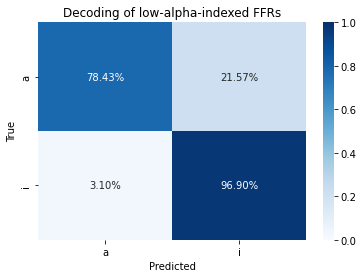

In [74]:
categories = ['a', 'i']
sns.heatmap(np.mean(lo_cm, axis=0), annot=True, fmt='.2%', cmap='Blues',xticklabels=categories,yticklabels=categories,
           vmin=0, vmax=1)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decoding of low-alpha-indexed FFRs')
figpath='C:\\Users\\jlai\\OneDrive\\SIN attention\\Figs_tables\\'
plt.savefig(figpath+'Lo_MLcm_na.pdf')

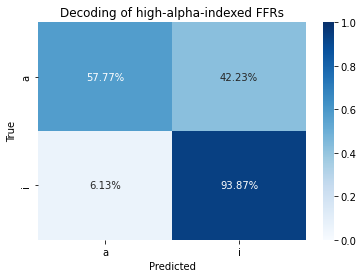

In [75]:
sns.heatmap(np.mean(hi_cm, axis=0), annot=True, fmt='.2%', cmap='Blues',xticklabels=categories,yticklabels=categories,
           vmin=0, vmax=1)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decoding of high-alpha-indexed FFRs')
plt.savefig(figpath+'Hi_MLcm_na.pdf')

## SVM for null distribution

In [49]:
null_lo_df=lo_df.copy()
null_hi_df=hi_df.copy()
null_lo_df['Token'].values

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2], dtype=int64)

In [50]:
#lo_df_ss=null_lo_df[null_lo_df.index==1]
#a= list(lo_df_ss['Token'].values)
#random.shuffle(a)
#a

In [51]:
for ss in range(1,21):
    lo_df_ss=null_lo_df[null_lo_df.index==ss]
    y = list(lo_df_ss['Token'].values)
    random.shuffle(y)
    #print(y)
    null_lo_df.loc[ss,'Token']=y
    
    hi_df_ss=null_hi_df[null_hi_df.index==ss]
    y = list(hi_df_ss['Token'].values)
    random.shuffle(y)
    #print(y)
    null_hi_df.loc[ss,'Token']=y

In [52]:
null_lo_df['Token']=np.random.permutation(null_lo_df['Token'].values)
null_lo_df['Token'].values

array([1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2], dtype=int64)

In [53]:
null_hi_df['Token']=np.random.permutation(null_hi_df['Token'].values)

In [54]:
null_hi_df['Token'].values

array([2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2], dtype=int64)

In [55]:
# decoding for low-alpha sffr
null_lo_acc=[]
null_lo_cm=[]
for iter in range(iter_no):
    lo_cv_res=CV_sub(null_lo_df,sub_list)
    null_lo_acc.append(lo_cv_res['mean_acc'])
    null_lo_cm.append(lo_cv_res['mean_cm'])
    print('Iteration %d: %.2f' % (iter,lo_cv_res['mean_acc']))
    
grand_acc_lo=mean(null_lo_acc)
grand_cm_lo=np.mean(null_lo_cm, axis=0 )
print(grand_acc_lo)
print(grand_cm_lo)

Iteration 0: 0.40
Iteration 1: 0.43
Iteration 2: 0.30
Iteration 3: 0.33
Iteration 4: 0.32
Iteration 5: 0.38
Iteration 6: 0.35
Iteration 7: 0.45
Iteration 8: 0.35
Iteration 9: 0.30
Iteration 10: 0.35
Iteration 11: 0.33
Iteration 12: 0.35
Iteration 13: 0.50
Iteration 14: 0.35
Iteration 15: 0.35
Iteration 16: 0.35
Iteration 17: 0.35
Iteration 18: 0.35
Iteration 19: 0.30
Iteration 20: 0.35
Iteration 21: 0.42
Iteration 22: 0.35
Iteration 23: 0.32
Iteration 24: 0.38
Iteration 25: 0.45
Iteration 26: 0.40
Iteration 27: 0.35
Iteration 28: 0.35
Iteration 29: 0.30
Iteration 30: 0.35
Iteration 31: 0.30
Iteration 32: 0.45
Iteration 33: 0.35
Iteration 34: 0.28
Iteration 35: 0.35
Iteration 36: 0.40
Iteration 37: 0.38
Iteration 38: 0.40
Iteration 39: 0.38
Iteration 40: 0.35
Iteration 41: 0.35
Iteration 42: 0.35
Iteration 43: 0.43
Iteration 44: 0.38
Iteration 45: 0.35
Iteration 46: 0.43
Iteration 47: 0.35
Iteration 48: 0.30
Iteration 49: 0.40
Iteration 50: 0.35
Iteration 51: 0.28
Iteration 52: 0.43
Ite

Iteration 420: 0.38
Iteration 421: 0.43
Iteration 422: 0.35
Iteration 423: 0.35
Iteration 424: 0.40
Iteration 425: 0.35
Iteration 426: 0.43
Iteration 427: 0.35
Iteration 428: 0.40
Iteration 429: 0.40
Iteration 430: 0.35
Iteration 431: 0.40
Iteration 432: 0.40
Iteration 433: 0.30
Iteration 434: 0.33
Iteration 435: 0.40
Iteration 436: 0.35
Iteration 437: 0.40
Iteration 438: 0.35
Iteration 439: 0.45
Iteration 440: 0.35
Iteration 441: 0.30
Iteration 442: 0.35
Iteration 443: 0.40
Iteration 444: 0.40
Iteration 445: 0.27
Iteration 446: 0.43
Iteration 447: 0.43
Iteration 448: 0.35
Iteration 449: 0.30
Iteration 450: 0.35
Iteration 451: 0.38
Iteration 452: 0.35
Iteration 453: 0.35
Iteration 454: 0.35
Iteration 455: 0.43
Iteration 456: 0.33
Iteration 457: 0.35
Iteration 458: 0.38
Iteration 459: 0.43
Iteration 460: 0.40
Iteration 461: 0.33
Iteration 462: 0.35
Iteration 463: 0.42
Iteration 464: 0.45
Iteration 465: 0.38
Iteration 466: 0.28
Iteration 467: 0.38
Iteration 468: 0.33
Iteration 469: 0.38


C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 521: 0.38
Iteration 522: 0.35
Iteration 523: 0.40
Iteration 524: 0.35
Iteration 525: 0.25
Iteration 526: 0.40
Iteration 527: 0.43
Iteration 528: 0.32
Iteration 529: 0.47
Iteration 530: 0.38
Iteration 531: 0.33
Iteration 532: 0.40
Iteration 533: 0.47
Iteration 534: 0.43
Iteration 535: 0.40
Iteration 536: 0.35
Iteration 537: 0.40
Iteration 538: 0.40
Iteration 539: 0.28
Iteration 540: 0.38
Iteration 541: 0.43
Iteration 542: 0.40
Iteration 543: 0.38
Iteration 544: 0.35
Iteration 545: 0.30
Iteration 546: 0.30
Iteration 547: 0.35
Iteration 548: 0.40
Iteration 549: 0.38
Iteration 550: 0.40
Iteration 551: 0.30
Iteration 552: 0.35
Iteration 553: 0.40
Iteration 554: 0.38
Iteration 555: 0.30
Iteration 556: 0.40
Iteration 557: 0.40
Iteration 558: 0.35
Iteration 559: 0.40
Iteration 560: 0.40
Iteration 561: 0.40
Iteration 562: 0.20
Iteration 563: 0.40
Iteration 564: 0.47
Iteration 565: 0.33
Iteration 566: 0.35
Iteration 567: 0.40
Iteration 568: 0.45
Iteration 569: 0.40
Iteration 570: 0.30


C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 574: 0.35
Iteration 575: 0.30
Iteration 576: 0.35
Iteration 577: 0.33
Iteration 578: 0.40
Iteration 579: 0.40
Iteration 580: 0.35
Iteration 581: 0.40
Iteration 582: 0.38
Iteration 583: 0.42
Iteration 584: 0.35
Iteration 585: 0.45
Iteration 586: 0.45
Iteration 587: 0.45
Iteration 588: 0.45
Iteration 589: 0.40
Iteration 590: 0.48
Iteration 591: 0.35
Iteration 592: 0.47
Iteration 593: 0.40
Iteration 594: 0.38
Iteration 595: 0.32
Iteration 596: 0.38
Iteration 597: 0.30
Iteration 598: 0.35
Iteration 599: 0.43
Iteration 600: 0.35
Iteration 601: 0.35
Iteration 602: 0.40
Iteration 603: 0.35
Iteration 604: 0.43
Iteration 605: 0.40
Iteration 606: 0.38
Iteration 607: 0.33
Iteration 608: 0.40
Iteration 609: 0.47
Iteration 610: 0.35
Iteration 611: 0.35
Iteration 612: 0.38
Iteration 613: 0.35
Iteration 614: 0.35
Iteration 615: 0.32
Iteration 616: 0.25
Iteration 617: 0.38
Iteration 618: 0.30
Iteration 619: 0.40
Iteration 620: 0.40
Iteration 621: 0.35
Iteration 622: 0.30
Iteration 623: 0.28


C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 671: 0.38
Iteration 672: 0.35
Iteration 673: 0.42
Iteration 674: 0.35
Iteration 675: 0.42
Iteration 676: 0.40
Iteration 677: 0.38
Iteration 678: 0.43
Iteration 679: 0.35
Iteration 680: 0.35
Iteration 681: 0.45
Iteration 682: 0.35
Iteration 683: 0.45
Iteration 684: 0.40
Iteration 685: 0.40
Iteration 686: 0.25
Iteration 687: 0.50
Iteration 688: 0.47
Iteration 689: 0.38
Iteration 690: 0.40
Iteration 691: 0.40
Iteration 692: 0.35
Iteration 693: 0.38
Iteration 694: 0.42
Iteration 695: 0.38
Iteration 696: 0.30
Iteration 697: 0.35
Iteration 698: 0.38
Iteration 699: 0.30
Iteration 700: 0.43
Iteration 701: 0.30
Iteration 702: 0.35
Iteration 703: 0.40
Iteration 704: 0.40
Iteration 705: 0.35
Iteration 706: 0.30
Iteration 707: 0.35
Iteration 708: 0.45
Iteration 709: 0.43
Iteration 710: 0.35
Iteration 711: 0.42
Iteration 712: 0.35
Iteration 713: 0.33
Iteration 714: 0.42
Iteration 715: 0.40
Iteration 716: 0.35
Iteration 717: 0.40
Iteration 718: 0.40
Iteration 719: 0.35
Iteration 720: 0.33


C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 841: 0.20
Iteration 842: 0.30
Iteration 843: 0.38
Iteration 844: 0.40
Iteration 845: 0.25
Iteration 846: 0.33
Iteration 847: 0.35
Iteration 848: 0.45
Iteration 849: 0.35
Iteration 850: 0.35
Iteration 851: 0.40
Iteration 852: 0.47
Iteration 853: 0.30
Iteration 854: 0.35
Iteration 855: 0.33
Iteration 856: 0.38
Iteration 857: 0.45
Iteration 858: 0.35
Iteration 859: 0.32
Iteration 860: 0.45
Iteration 861: 0.35
Iteration 862: 0.38
Iteration 863: 0.25
Iteration 864: 0.30
Iteration 865: 0.30
Iteration 866: 0.38
Iteration 867: 0.40
Iteration 868: 0.40
Iteration 869: 0.35
Iteration 870: 0.33
Iteration 871: 0.35
Iteration 872: 0.38
Iteration 873: 0.43
Iteration 874: 0.33
Iteration 875: 0.35
Iteration 876: 0.38
Iteration 877: 0.40
Iteration 878: 0.40
Iteration 879: 0.40
Iteration 880: 0.40
Iteration 881: 0.38
Iteration 882: 0.38
Iteration 883: 0.40
Iteration 884: 0.30
Iteration 885: 0.38
Iteration 886: 0.40
Iteration 887: 0.38
Iteration 888: 0.30
Iteration 889: 0.40
Iteration 890: 0.33


Iteration 1240: 0.35
Iteration 1241: 0.30
Iteration 1242: 0.25
Iteration 1243: 0.35
Iteration 1244: 0.25
Iteration 1245: 0.35
Iteration 1246: 0.30
Iteration 1247: 0.38
Iteration 1248: 0.40
Iteration 1249: 0.30
Iteration 1250: 0.40
Iteration 1251: 0.28
Iteration 1252: 0.30
Iteration 1253: 0.35
Iteration 1254: 0.35
Iteration 1255: 0.47
Iteration 1256: 0.35
Iteration 1257: 0.30
Iteration 1258: 0.38
Iteration 1259: 0.40
Iteration 1260: 0.45
Iteration 1261: 0.50
Iteration 1262: 0.30
Iteration 1263: 0.43
Iteration 1264: 0.38
Iteration 1265: 0.25
Iteration 1266: 0.40
Iteration 1267: 0.43
Iteration 1268: 0.35
Iteration 1269: 0.35
Iteration 1270: 0.35
Iteration 1271: 0.35
Iteration 1272: 0.38
Iteration 1273: 0.43
Iteration 1274: 0.38
Iteration 1275: 0.25
Iteration 1276: 0.40
Iteration 1277: 0.43
Iteration 1278: 0.43
Iteration 1279: 0.35
Iteration 1280: 0.35
Iteration 1281: 0.35
Iteration 1282: 0.40
Iteration 1283: 0.30
Iteration 1284: 0.27
Iteration 1285: 0.30
Iteration 1286: 0.40
Iteration 128

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 1372: 0.40
Iteration 1373: 0.40
Iteration 1374: 0.25
Iteration 1375: 0.45
Iteration 1376: 0.35
Iteration 1377: 0.33
Iteration 1378: 0.33
Iteration 1379: 0.38
Iteration 1380: 0.35
Iteration 1381: 0.40
Iteration 1382: 0.38
Iteration 1383: 0.40
Iteration 1384: 0.45
Iteration 1385: 0.35
Iteration 1386: 0.48
Iteration 1387: 0.47
Iteration 1388: 0.35
Iteration 1389: 0.30
Iteration 1390: 0.47
Iteration 1391: 0.35
Iteration 1392: 0.47
Iteration 1393: 0.40
Iteration 1394: 0.40
Iteration 1395: 0.40
Iteration 1396: 0.42
Iteration 1397: 0.40
Iteration 1398: 0.40
Iteration 1399: 0.35
Iteration 1400: 0.38
Iteration 1401: 0.35
Iteration 1402: 0.38
Iteration 1403: 0.30
Iteration 1404: 0.35
Iteration 1405: 0.38
Iteration 1406: 0.40
Iteration 1407: 0.35
Iteration 1408: 0.28
Iteration 1409: 0.40
Iteration 1410: 0.35
Iteration 1411: 0.40
Iteration 1412: 0.35
Iteration 1413: 0.28
Iteration 1414: 0.38
Iteration 1415: 0.35
Iteration 1416: 0.40
Iteration 1417: 0.32
Iteration 1418: 0.35
Iteration 141

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 1735: 0.25
Iteration 1736: 0.38
Iteration 1737: 0.40
Iteration 1738: 0.30
Iteration 1739: 0.38
Iteration 1740: 0.40
Iteration 1741: 0.47
Iteration 1742: 0.40
Iteration 1743: 0.50
Iteration 1744: 0.38
Iteration 1745: 0.30
Iteration 1746: 0.35
Iteration 1747: 0.35
Iteration 1748: 0.23


C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 1749: 0.35
Iteration 1750: 0.45
Iteration 1751: 0.40
Iteration 1752: 0.40
Iteration 1753: 0.40
Iteration 1754: 0.40
Iteration 1755: 0.35
Iteration 1756: 0.30
Iteration 1757: 0.38
Iteration 1758: 0.38
Iteration 1759: 0.40
Iteration 1760: 0.42
Iteration 1761: 0.38
Iteration 1762: 0.30
Iteration 1763: 0.47
Iteration 1764: 0.35
Iteration 1765: 0.53
Iteration 1766: 0.35
Iteration 1767: 0.35
Iteration 1768: 0.38
Iteration 1769: 0.25
Iteration 1770: 0.43
Iteration 1771: 0.45
Iteration 1772: 0.45
Iteration 1773: 0.43
Iteration 1774: 0.40
Iteration 1775: 0.30
Iteration 1776: 0.35
Iteration 1777: 0.45
Iteration 1778: 0.35
Iteration 1779: 0.35
Iteration 1780: 0.33
Iteration 1781: 0.45
Iteration 1782: 0.42
Iteration 1783: 0.35
Iteration 1784: 0.30
Iteration 1785: 0.43
Iteration 1786: 0.35
Iteration 1787: 0.33
Iteration 1788: 0.25
Iteration 1789: 0.47
Iteration 1790: 0.35
Iteration 1791: 0.35
Iteration 1792: 0.28
Iteration 1793: 0.50
Iteration 1794: 0.35
Iteration 1795: 0.30
Iteration 179

Iteration 2143: 0.35
Iteration 2144: 0.40
Iteration 2145: 0.38
Iteration 2146: 0.35
Iteration 2147: 0.35
Iteration 2148: 0.40
Iteration 2149: 0.38
Iteration 2150: 0.35
Iteration 2151: 0.38
Iteration 2152: 0.35
Iteration 2153: 0.40
Iteration 2154: 0.35
Iteration 2155: 0.40
Iteration 2156: 0.38
Iteration 2157: 0.33
Iteration 2158: 0.38
Iteration 2159: 0.40
Iteration 2160: 0.25
Iteration 2161: 0.30
Iteration 2162: 0.38
Iteration 2163: 0.35
Iteration 2164: 0.40
Iteration 2165: 0.45
Iteration 2166: 0.25
Iteration 2167: 0.35
Iteration 2168: 0.35
Iteration 2169: 0.40
Iteration 2170: 0.33
Iteration 2171: 0.35
Iteration 2172: 0.35
Iteration 2173: 0.30
Iteration 2174: 0.42
Iteration 2175: 0.35
Iteration 2176: 0.50
Iteration 2177: 0.38
Iteration 2178: 0.42
Iteration 2179: 0.45
Iteration 2180: 0.40
Iteration 2181: 0.35
Iteration 2182: 0.47
Iteration 2183: 0.40
Iteration 2184: 0.30
Iteration 2185: 0.38
Iteration 2186: 0.35
Iteration 2187: 0.25
Iteration 2188: 0.35
Iteration 2189: 0.25


C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 2190: 0.28
Iteration 2191: 0.35
Iteration 2192: 0.35
Iteration 2193: 0.38
Iteration 2194: 0.38
Iteration 2195: 0.35
Iteration 2196: 0.40
Iteration 2197: 0.30
Iteration 2198: 0.40
Iteration 2199: 0.38
Iteration 2200: 0.47
Iteration 2201: 0.38
Iteration 2202: 0.38
Iteration 2203: 0.50
Iteration 2204: 0.35
Iteration 2205: 0.38
Iteration 2206: 0.40
Iteration 2207: 0.45
Iteration 2208: 0.35
Iteration 2209: 0.40
Iteration 2210: 0.25
Iteration 2211: 0.33
Iteration 2212: 0.35
Iteration 2213: 0.25
Iteration 2214: 0.32
Iteration 2215: 0.35
Iteration 2216: 0.33
Iteration 2217: 0.40
Iteration 2218: 0.43
Iteration 2219: 0.27
Iteration 2220: 0.33
Iteration 2221: 0.30
Iteration 2222: 0.42
Iteration 2223: 0.38
Iteration 2224: 0.45
Iteration 2225: 0.40
Iteration 2226: 0.35
Iteration 2227: 0.42
Iteration 2228: 0.30
Iteration 2229: 0.40
Iteration 2230: 0.30
Iteration 2231: 0.45
Iteration 2232: 0.35
Iteration 2233: 0.35
Iteration 2234: 0.25
Iteration 2235: 0.33
Iteration 2236: 0.43
Iteration 223

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 2466: 0.43
Iteration 2467: 0.35
Iteration 2468: 0.30
Iteration 2469: 0.35
Iteration 2470: 0.40
Iteration 2471: 0.38
Iteration 2472: 0.45
Iteration 2473: 0.30
Iteration 2474: 0.30
Iteration 2475: 0.38
Iteration 2476: 0.40
Iteration 2477: 0.40
Iteration 2478: 0.35
Iteration 2479: 0.45
Iteration 2480: 0.38
Iteration 2481: 0.25
Iteration 2482: 0.45
Iteration 2483: 0.35
Iteration 2484: 0.42
Iteration 2485: 0.30
Iteration 2486: 0.43
Iteration 2487: 0.50
Iteration 2488: 0.35
Iteration 2489: 0.30
Iteration 2490: 0.40
Iteration 2491: 0.33
Iteration 2492: 0.35
Iteration 2493: 0.40
Iteration 2494: 0.33
Iteration 2495: 0.47
Iteration 2496: 0.40
Iteration 2497: 0.50
Iteration 2498: 0.40
Iteration 2499: 0.40
Iteration 2500: 0.43
Iteration 2501: 0.40
Iteration 2502: 0.42
Iteration 2503: 0.35
Iteration 2504: 0.38
Iteration 2505: 0.43
Iteration 2506: 0.33
Iteration 2507: 0.47
Iteration 2508: 0.40
Iteration 2509: 0.42
Iteration 2510: 0.43
Iteration 2511: 0.38
Iteration 2512: 0.40
Iteration 251

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 2558: 0.30
Iteration 2559: 0.30
Iteration 2560: 0.40
Iteration 2561: 0.35
Iteration 2562: 0.40
Iteration 2563: 0.35
Iteration 2564: 0.35
Iteration 2565: 0.40
Iteration 2566: 0.35
Iteration 2567: 0.40
Iteration 2568: 0.47
Iteration 2569: 0.30
Iteration 2570: 0.45
Iteration 2571: 0.45
Iteration 2572: 0.38
Iteration 2573: 0.43
Iteration 2574: 0.35
Iteration 2575: 0.48
Iteration 2576: 0.40
Iteration 2577: 0.35
Iteration 2578: 0.38
Iteration 2579: 0.35
Iteration 2580: 0.35
Iteration 2581: 0.38
Iteration 2582: 0.35
Iteration 2583: 0.35
Iteration 2584: 0.35
Iteration 2585: 0.35
Iteration 2586: 0.33
Iteration 2587: 0.40
Iteration 2588: 0.38
Iteration 2589: 0.38
Iteration 2590: 0.40
Iteration 2591: 0.35
Iteration 2592: 0.33
Iteration 2593: 0.38
Iteration 2594: 0.35
Iteration 2595: 0.35
Iteration 2596: 0.38
Iteration 2597: 0.35
Iteration 2598: 0.35
Iteration 2599: 0.35
Iteration 2600: 0.35
Iteration 2601: 0.38
Iteration 2602: 0.40
Iteration 2603: 0.38
Iteration 2604: 0.38
Iteration 260

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 2645: 0.30
Iteration 2646: 0.35
Iteration 2647: 0.45
Iteration 2648: 0.40
Iteration 2649: 0.40
Iteration 2650: 0.38
Iteration 2651: 0.35
Iteration 2652: 0.35
Iteration 2653: 0.38
Iteration 2654: 0.43
Iteration 2655: 0.33
Iteration 2656: 0.43
Iteration 2657: 0.40
Iteration 2658: 0.40
Iteration 2659: 0.45
Iteration 2660: 0.38
Iteration 2661: 0.40
Iteration 2662: 0.40
Iteration 2663: 0.30
Iteration 2664: 0.40
Iteration 2665: 0.35
Iteration 2666: 0.33
Iteration 2667: 0.32
Iteration 2668: 0.38
Iteration 2669: 0.47
Iteration 2670: 0.43
Iteration 2671: 0.43
Iteration 2672: 0.28
Iteration 2673: 0.45
Iteration 2674: 0.38
Iteration 2675: 0.35
Iteration 2676: 0.35
Iteration 2677: 0.47
Iteration 2678: 0.38
Iteration 2679: 0.33
Iteration 2680: 0.35
Iteration 2681: 0.43
Iteration 2682: 0.42
Iteration 2683: 0.35
Iteration 2684: 0.35
Iteration 2685: 0.45
Iteration 2686: 0.33
Iteration 2687: 0.40
Iteration 2688: 0.37
Iteration 2689: 0.35
Iteration 2690: 0.40
Iteration 2691: 0.25
Iteration 269

Iteration 3037: 0.35
Iteration 3038: 0.43
Iteration 3039: 0.42
Iteration 3040: 0.40
Iteration 3041: 0.38
Iteration 3042: 0.43
Iteration 3043: 0.30
Iteration 3044: 0.35
Iteration 3045: 0.30
Iteration 3046: 0.45
Iteration 3047: 0.30
Iteration 3048: 0.33
Iteration 3049: 0.40
Iteration 3050: 0.30
Iteration 3051: 0.38
Iteration 3052: 0.38
Iteration 3053: 0.20
Iteration 3054: 0.35
Iteration 3055: 0.35
Iteration 3056: 0.42
Iteration 3057: 0.35
Iteration 3058: 0.35
Iteration 3059: 0.35
Iteration 3060: 0.28
Iteration 3061: 0.35
Iteration 3062: 0.40
Iteration 3063: 0.38
Iteration 3064: 0.35
Iteration 3065: 0.30
Iteration 3066: 0.43
Iteration 3067: 0.30
Iteration 3068: 0.47
Iteration 3069: 0.30
Iteration 3070: 0.40
Iteration 3071: 0.40
Iteration 3072: 0.42
Iteration 3073: 0.48
Iteration 3074: 0.32
Iteration 3075: 0.33
Iteration 3076: 0.40
Iteration 3077: 0.40
Iteration 3078: 0.45
Iteration 3079: 0.40
Iteration 3080: 0.40
Iteration 3081: 0.45
Iteration 3082: 0.40
Iteration 3083: 0.40
Iteration 308

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 3136: 0.30
Iteration 3137: 0.47
Iteration 3138: 0.40
Iteration 3139: 0.43
Iteration 3140: 0.33
Iteration 3141: 0.38
Iteration 3142: 0.33
Iteration 3143: 0.35
Iteration 3144: 0.30
Iteration 3145: 0.30
Iteration 3146: 0.38
Iteration 3147: 0.30
Iteration 3148: 0.40
Iteration 3149: 0.35
Iteration 3150: 0.35
Iteration 3151: 0.25
Iteration 3152: 0.38
Iteration 3153: 0.40
Iteration 3154: 0.35
Iteration 3155: 0.35
Iteration 3156: 0.40
Iteration 3157: 0.38
Iteration 3158: 0.30
Iteration 3159: 0.30
Iteration 3160: 0.35
Iteration 3161: 0.45
Iteration 3162: 0.38
Iteration 3163: 0.35
Iteration 3164: 0.33
Iteration 3165: 0.32
Iteration 3166: 0.38
Iteration 3167: 0.40
Iteration 3168: 0.35
Iteration 3169: 0.38
Iteration 3170: 0.33
Iteration 3171: 0.33
Iteration 3172: 0.25
Iteration 3173: 0.38
Iteration 3174: 0.43
Iteration 3175: 0.38
Iteration 3176: 0.33
Iteration 3177: 0.35
Iteration 3178: 0.40
Iteration 3179: 0.35
Iteration 3180: 0.35
Iteration 3181: 0.35
Iteration 3182: 0.35
Iteration 318

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 3508: 0.43
Iteration 3509: 0.35
Iteration 3510: 0.35
Iteration 3511: 0.40
Iteration 3512: 0.35
Iteration 3513: 0.47
Iteration 3514: 0.40
Iteration 3515: 0.33
Iteration 3516: 0.45
Iteration 3517: 0.38
Iteration 3518: 0.40
Iteration 3519: 0.35
Iteration 3520: 0.35
Iteration 3521: 0.38
Iteration 3522: 0.35
Iteration 3523: 0.40
Iteration 3524: 0.35
Iteration 3525: 0.35
Iteration 3526: 0.45
Iteration 3527: 0.40
Iteration 3528: 0.38
Iteration 3529: 0.38
Iteration 3530: 0.40
Iteration 3531: 0.43
Iteration 3532: 0.40
Iteration 3533: 0.33
Iteration 3534: 0.38
Iteration 3535: 0.35
Iteration 3536: 0.38
Iteration 3537: 0.30
Iteration 3538: 0.43
Iteration 3539: 0.35
Iteration 3540: 0.38
Iteration 3541: 0.33
Iteration 3542: 0.30
Iteration 3543: 0.35
Iteration 3544: 0.35
Iteration 3545: 0.22
Iteration 3546: 0.30
Iteration 3547: 0.20
Iteration 3548: 0.35
Iteration 3549: 0.30
Iteration 3550: 0.35
Iteration 3551: 0.30
Iteration 3552: 0.40
Iteration 3553: 0.32
Iteration 3554: 0.40
Iteration 355

Iteration 3903: 0.40
Iteration 3904: 0.35
Iteration 3905: 0.35
Iteration 3906: 0.35
Iteration 3907: 0.35
Iteration 3908: 0.30
Iteration 3909: 0.37
Iteration 3910: 0.35
Iteration 3911: 0.35
Iteration 3912: 0.45
Iteration 3913: 0.42
Iteration 3914: 0.35
Iteration 3915: 0.43
Iteration 3916: 0.43
Iteration 3917: 0.45
Iteration 3918: 0.30
Iteration 3919: 0.33
Iteration 3920: 0.35
Iteration 3921: 0.30
Iteration 3922: 0.40
Iteration 3923: 0.40
Iteration 3924: 0.47
Iteration 3925: 0.35
Iteration 3926: 0.40
Iteration 3927: 0.35
Iteration 3928: 0.43
Iteration 3929: 0.45
Iteration 3930: 0.38
Iteration 3931: 0.40
Iteration 3932: 0.28
Iteration 3933: 0.42
Iteration 3934: 0.35
Iteration 3935: 0.40
Iteration 3936: 0.40
Iteration 3937: 0.30
Iteration 3938: 0.30
Iteration 3939: 0.42
Iteration 3940: 0.43
Iteration 3941: 0.35
Iteration 3942: 0.30
Iteration 3943: 0.40
Iteration 3944: 0.33
Iteration 3945: 0.43
Iteration 3946: 0.43
Iteration 3947: 0.43
Iteration 3948: 0.35
Iteration 3949: 0.35
Iteration 395

C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 3979: 0.38
Iteration 3980: 0.38
Iteration 3981: 0.35
Iteration 3982: 0.30
Iteration 3983: 0.38
Iteration 3984: 0.38
Iteration 3985: 0.38
Iteration 3986: 0.35
Iteration 3987: 0.43
Iteration 3988: 0.38
Iteration 3989: 0.47
Iteration 3990: 0.28
Iteration 3991: 0.35
Iteration 3992: 0.40
Iteration 3993: 0.30
Iteration 3994: 0.38
Iteration 3995: 0.50
Iteration 3996: 0.30
Iteration 3997: 0.40
Iteration 3998: 0.33
Iteration 3999: 0.30
Iteration 4000: 0.35
Iteration 4001: 0.43
Iteration 4002: 0.35
Iteration 4003: 0.45
Iteration 4004: 0.35
Iteration 4005: 0.25
Iteration 4006: 0.38
Iteration 4007: 0.35
Iteration 4008: 0.40
Iteration 4009: 0.47
Iteration 4010: 0.20
Iteration 4011: 0.43
Iteration 4012: 0.40
Iteration 4013: 0.40
Iteration 4014: 0.43
Iteration 4015: 0.33
Iteration 4016: 0.25
Iteration 4017: 0.45
Iteration 4018: 0.35
Iteration 4019: 0.35
Iteration 4020: 0.30
Iteration 4021: 0.45
Iteration 4022: 0.40
Iteration 4023: 0.38
Iteration 4024: 0.47
Iteration 4025: 0.42
Iteration 402

Iteration 4371: 0.40
Iteration 4372: 0.40
Iteration 4373: 0.38
Iteration 4374: 0.38
Iteration 4375: 0.35
Iteration 4376: 0.35
Iteration 4377: 0.35
Iteration 4378: 0.33
Iteration 4379: 0.38
Iteration 4380: 0.38
Iteration 4381: 0.35
Iteration 4382: 0.40
Iteration 4383: 0.30
Iteration 4384: 0.40
Iteration 4385: 0.40
Iteration 4386: 0.35
Iteration 4387: 0.40
Iteration 4388: 0.40
Iteration 4389: 0.30
Iteration 4390: 0.38
Iteration 4391: 0.35
Iteration 4392: 0.30
Iteration 4393: 0.38
Iteration 4394: 0.47
Iteration 4395: 0.35
Iteration 4396: 0.30
Iteration 4397: 0.30
Iteration 4398: 0.33
Iteration 4399: 0.35
Iteration 4400: 0.30
Iteration 4401: 0.35
Iteration 4402: 0.45
Iteration 4403: 0.35
Iteration 4404: 0.45
Iteration 4405: 0.38
Iteration 4406: 0.35
Iteration 4407: 0.30
Iteration 4408: 0.40
Iteration 4409: 0.35
Iteration 4410: 0.30
Iteration 4411: 0.40
Iteration 4412: 0.40
Iteration 4413: 0.38
Iteration 4414: 0.38
Iteration 4415: 0.47
Iteration 4416: 0.35
Iteration 4417: 0.30
Iteration 441

Iteration 4764: 0.33
Iteration 4765: 0.20
Iteration 4766: 0.40
Iteration 4767: 0.30
Iteration 4768: 0.38
Iteration 4769: 0.45
Iteration 4770: 0.30
Iteration 4771: 0.38
Iteration 4772: 0.40
Iteration 4773: 0.35
Iteration 4774: 0.35
Iteration 4775: 0.30
Iteration 4776: 0.30
Iteration 4777: 0.35
Iteration 4778: 0.30
Iteration 4779: 0.38
Iteration 4780: 0.40
Iteration 4781: 0.33
Iteration 4782: 0.30
Iteration 4783: 0.40
Iteration 4784: 0.38
Iteration 4785: 0.25
Iteration 4786: 0.33
Iteration 4787: 0.35
Iteration 4788: 0.45
Iteration 4789: 0.45
Iteration 4790: 0.30
Iteration 4791: 0.25
Iteration 4792: 0.35
Iteration 4793: 0.40


C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: divide by zero encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)
C:\Users\jlai\AppData\Local\Temp/ipykernel_28484/418708882.py:35: RuntimeWarning: invalid value encountered in true_divide
  cm = cm / cm.astype(float).sum(axis=1)


Iteration 4794: 0.40
Iteration 4795: 0.38
Iteration 4796: 0.32
Iteration 4797: 0.33
Iteration 4798: 0.45
Iteration 4799: 0.40
Iteration 4800: 0.40
Iteration 4801: 0.40
Iteration 4802: 0.35
Iteration 4803: 0.45
Iteration 4804: 0.35
Iteration 4805: 0.35
Iteration 4806: 0.40
Iteration 4807: 0.47
Iteration 4808: 0.45
Iteration 4809: 0.40
Iteration 4810: 0.35
Iteration 4811: 0.40
Iteration 4812: 0.40
Iteration 4813: 0.38
Iteration 4814: 0.25
Iteration 4815: 0.35
Iteration 4816: 0.30
Iteration 4817: 0.35
Iteration 4818: 0.35
Iteration 4819: 0.33
Iteration 4820: 0.38
Iteration 4821: 0.30
Iteration 4822: 0.35
Iteration 4823: 0.32
Iteration 4824: 0.40
Iteration 4825: 0.38
Iteration 4826: 0.43
Iteration 4827: 0.35
Iteration 4828: 0.25
Iteration 4829: 0.40
Iteration 4830: 0.40
Iteration 4831: 0.35
Iteration 4832: 0.35
Iteration 4833: 0.53
Iteration 4834: 0.30
Iteration 4835: 0.35
Iteration 4836: 0.38
Iteration 4837: 0.30
Iteration 4838: 0.40
Iteration 4839: 0.25
Iteration 4840: 0.38
Iteration 484

In [56]:
#null_lo_acc[200]

In [57]:
# decoding for high-alpha sffr
null_hi_acc=[]
null_hi_cm=[]
for iter in range(iter_no):
    hi_cv_res=CV_sub(null_hi_df,sub_list)
    null_hi_acc.append(hi_cv_res['mean_acc'])
    null_hi_cm.append(hi_cv_res['mean_cm'])
    print('Iteration %d: %.2f' % (iter,hi_cv_res['mean_acc']))
    
grand_acc_hi=mean(null_hi_acc)
grand_cm_hi=np.mean(null_hi_cm, axis=0)
print(grand_acc_hi)
print(grand_cm_hi)

Iteration 0: 0.30
Iteration 1: 0.43
Iteration 2: 0.50
Iteration 3: 0.43
Iteration 4: 0.40
Iteration 5: 0.40
Iteration 6: 0.35
Iteration 7: 0.40
Iteration 8: 0.40
Iteration 9: 0.38
Iteration 10: 0.45
Iteration 11: 0.50
Iteration 12: 0.30
Iteration 13: 0.43
Iteration 14: 0.43
Iteration 15: 0.35
Iteration 16: 0.38
Iteration 17: 0.53
Iteration 18: 0.45
Iteration 19: 0.40
Iteration 20: 0.40
Iteration 21: 0.40
Iteration 22: 0.40
Iteration 23: 0.40
Iteration 24: 0.35
Iteration 25: 0.43
Iteration 26: 0.40
Iteration 27: 0.45
Iteration 28: 0.47
Iteration 29: 0.35
Iteration 30: 0.35
Iteration 31: 0.40
Iteration 32: 0.40
Iteration 33: 0.40
Iteration 34: 0.45
Iteration 35: 0.40
Iteration 36: 0.40
Iteration 37: 0.40
Iteration 38: 0.30
Iteration 39: 0.40
Iteration 40: 0.40
Iteration 41: 0.45
Iteration 42: 0.40
Iteration 43: 0.47
Iteration 44: 0.40
Iteration 45: 0.35
Iteration 46: 0.35
Iteration 47: 0.40
Iteration 48: 0.35
Iteration 49: 0.45
Iteration 50: 0.43
Iteration 51: 0.43
Iteration 52: 0.40
Ite

Iteration 419: 0.40
Iteration 420: 0.38
Iteration 421: 0.40
Iteration 422: 0.47
Iteration 423: 0.50
Iteration 424: 0.43
Iteration 425: 0.42
Iteration 426: 0.40
Iteration 427: 0.35
Iteration 428: 0.43
Iteration 429: 0.43
Iteration 430: 0.40
Iteration 431: 0.40
Iteration 432: 0.40
Iteration 433: 0.45
Iteration 434: 0.40
Iteration 435: 0.43
Iteration 436: 0.38
Iteration 437: 0.30
Iteration 438: 0.40
Iteration 439: 0.47
Iteration 440: 0.40
Iteration 441: 0.30
Iteration 442: 0.40
Iteration 443: 0.40
Iteration 444: 0.40
Iteration 445: 0.47
Iteration 446: 0.35
Iteration 447: 0.40
Iteration 448: 0.38
Iteration 449: 0.38
Iteration 450: 0.30
Iteration 451: 0.45
Iteration 452: 0.40
Iteration 453: 0.40
Iteration 454: 0.47
Iteration 455: 0.42
Iteration 456: 0.35
Iteration 457: 0.38
Iteration 458: 0.35
Iteration 459: 0.43
Iteration 460: 0.35
Iteration 461: 0.42
Iteration 462: 0.40
Iteration 463: 0.40
Iteration 464: 0.43
Iteration 465: 0.40
Iteration 466: 0.38
Iteration 467: 0.40
Iteration 468: 0.47


Iteration 829: 0.40
Iteration 830: 0.35
Iteration 831: 0.47
Iteration 832: 0.40
Iteration 833: 0.35
Iteration 834: 0.45
Iteration 835: 0.35
Iteration 836: 0.38
Iteration 837: 0.45
Iteration 838: 0.40
Iteration 839: 0.40
Iteration 840: 0.40
Iteration 841: 0.38
Iteration 842: 0.40
Iteration 843: 0.50
Iteration 844: 0.40
Iteration 845: 0.35
Iteration 846: 0.43
Iteration 847: 0.40
Iteration 848: 0.58
Iteration 849: 0.35
Iteration 850: 0.43
Iteration 851: 0.38
Iteration 852: 0.40
Iteration 853: 0.40
Iteration 854: 0.35
Iteration 855: 0.40
Iteration 856: 0.35
Iteration 857: 0.42
Iteration 858: 0.30
Iteration 859: 0.43
Iteration 860: 0.30
Iteration 861: 0.33
Iteration 862: 0.45
Iteration 863: 0.40
Iteration 864: 0.45
Iteration 865: 0.40
Iteration 866: 0.45
Iteration 867: 0.45
Iteration 868: 0.38
Iteration 869: 0.38
Iteration 870: 0.38
Iteration 871: 0.43
Iteration 872: 0.35
Iteration 873: 0.38
Iteration 874: 0.38
Iteration 875: 0.43
Iteration 876: 0.47
Iteration 877: 0.40
Iteration 878: 0.38


Iteration 1231: 0.30
Iteration 1232: 0.47
Iteration 1233: 0.40
Iteration 1234: 0.42
Iteration 1235: 0.35
Iteration 1236: 0.43
Iteration 1237: 0.35
Iteration 1238: 0.38
Iteration 1239: 0.35
Iteration 1240: 0.35
Iteration 1241: 0.40
Iteration 1242: 0.47
Iteration 1243: 0.35
Iteration 1244: 0.42
Iteration 1245: 0.42
Iteration 1246: 0.38
Iteration 1247: 0.38
Iteration 1248: 0.45
Iteration 1249: 0.35
Iteration 1250: 0.30
Iteration 1251: 0.40
Iteration 1252: 0.25
Iteration 1253: 0.40
Iteration 1254: 0.25
Iteration 1255: 0.35
Iteration 1256: 0.40
Iteration 1257: 0.40
Iteration 1258: 0.40
Iteration 1259: 0.40
Iteration 1260: 0.35
Iteration 1261: 0.40
Iteration 1262: 0.35
Iteration 1263: 0.42
Iteration 1264: 0.47
Iteration 1265: 0.45
Iteration 1266: 0.35
Iteration 1267: 0.40
Iteration 1268: 0.43
Iteration 1269: 0.30
Iteration 1270: 0.47
Iteration 1271: 0.45
Iteration 1272: 0.38
Iteration 1273: 0.45
Iteration 1274: 0.35
Iteration 1275: 0.45
Iteration 1276: 0.47
Iteration 1277: 0.45
Iteration 127

Iteration 1625: 0.35
Iteration 1626: 0.40
Iteration 1627: 0.40
Iteration 1628: 0.47
Iteration 1629: 0.45
Iteration 1630: 0.33
Iteration 1631: 0.40
Iteration 1632: 0.40
Iteration 1633: 0.40
Iteration 1634: 0.28
Iteration 1635: 0.45
Iteration 1636: 0.43
Iteration 1637: 0.40
Iteration 1638: 0.47
Iteration 1639: 0.47
Iteration 1640: 0.40
Iteration 1641: 0.38
Iteration 1642: 0.45
Iteration 1643: 0.40
Iteration 1644: 0.42
Iteration 1645: 0.40
Iteration 1646: 0.35
Iteration 1647: 0.33
Iteration 1648: 0.40
Iteration 1649: 0.43
Iteration 1650: 0.43
Iteration 1651: 0.38
Iteration 1652: 0.35
Iteration 1653: 0.45
Iteration 1654: 0.45
Iteration 1655: 0.30
Iteration 1656: 0.38
Iteration 1657: 0.40
Iteration 1658: 0.38
Iteration 1659: 0.35
Iteration 1660: 0.40
Iteration 1661: 0.40
Iteration 1662: 0.40
Iteration 1663: 0.40
Iteration 1664: 0.40
Iteration 1665: 0.35
Iteration 1666: 0.40
Iteration 1667: 0.30
Iteration 1668: 0.40
Iteration 1669: 0.40
Iteration 1670: 0.30
Iteration 1671: 0.35
Iteration 167

Iteration 2018: 0.40
Iteration 2019: 0.35
Iteration 2020: 0.30
Iteration 2021: 0.45
Iteration 2022: 0.40
Iteration 2023: 0.35
Iteration 2024: 0.38
Iteration 2025: 0.40
Iteration 2026: 0.45
Iteration 2027: 0.32
Iteration 2028: 0.45
Iteration 2029: 0.40
Iteration 2030: 0.43
Iteration 2031: 0.43
Iteration 2032: 0.40
Iteration 2033: 0.37
Iteration 2034: 0.45
Iteration 2035: 0.43
Iteration 2036: 0.40
Iteration 2037: 0.47
Iteration 2038: 0.40
Iteration 2039: 0.43
Iteration 2040: 0.40
Iteration 2041: 0.35
Iteration 2042: 0.47
Iteration 2043: 0.40
Iteration 2044: 0.43
Iteration 2045: 0.38
Iteration 2046: 0.35
Iteration 2047: 0.43
Iteration 2048: 0.35
Iteration 2049: 0.47
Iteration 2050: 0.40
Iteration 2051: 0.40
Iteration 2052: 0.35
Iteration 2053: 0.35
Iteration 2054: 0.35
Iteration 2055: 0.45
Iteration 2056: 0.50
Iteration 2057: 0.38
Iteration 2058: 0.40
Iteration 2059: 0.43
Iteration 2060: 0.40
Iteration 2061: 0.35
Iteration 2062: 0.47
Iteration 2063: 0.33
Iteration 2064: 0.45
Iteration 206

Iteration 2413: 0.38
Iteration 2414: 0.35
Iteration 2415: 0.35
Iteration 2416: 0.35
Iteration 2417: 0.40
Iteration 2418: 0.43
Iteration 2419: 0.40
Iteration 2420: 0.35
Iteration 2421: 0.40
Iteration 2422: 0.40
Iteration 2423: 0.62
Iteration 2424: 0.35
Iteration 2425: 0.40
Iteration 2426: 0.45
Iteration 2427: 0.38
Iteration 2428: 0.50
Iteration 2429: 0.42
Iteration 2430: 0.47
Iteration 2431: 0.40
Iteration 2432: 0.35
Iteration 2433: 0.43
Iteration 2434: 0.45
Iteration 2435: 0.40
Iteration 2436: 0.45
Iteration 2437: 0.40
Iteration 2438: 0.30
Iteration 2439: 0.40
Iteration 2440: 0.40
Iteration 2441: 0.33
Iteration 2442: 0.40
Iteration 2443: 0.35
Iteration 2444: 0.35
Iteration 2445: 0.43
Iteration 2446: 0.42
Iteration 2447: 0.40
Iteration 2448: 0.47
Iteration 2449: 0.30
Iteration 2450: 0.43
Iteration 2451: 0.40
Iteration 2452: 0.40
Iteration 2453: 0.40
Iteration 2454: 0.32
Iteration 2455: 0.38
Iteration 2456: 0.43
Iteration 2457: 0.35
Iteration 2458: 0.32
Iteration 2459: 0.45
Iteration 246

Iteration 2804: 0.40
Iteration 2805: 0.35
Iteration 2806: 0.40
Iteration 2807: 0.38
Iteration 2808: 0.40
Iteration 2809: 0.43
Iteration 2810: 0.38
Iteration 2811: 0.45
Iteration 2812: 0.47
Iteration 2813: 0.47
Iteration 2814: 0.35
Iteration 2815: 0.35
Iteration 2816: 0.40
Iteration 2817: 0.40
Iteration 2818: 0.35
Iteration 2819: 0.40
Iteration 2820: 0.35
Iteration 2821: 0.45
Iteration 2822: 0.40
Iteration 2823: 0.35
Iteration 2824: 0.40
Iteration 2825: 0.38
Iteration 2826: 0.30
Iteration 2827: 0.50
Iteration 2828: 0.50
Iteration 2829: 0.40
Iteration 2830: 0.43
Iteration 2831: 0.50
Iteration 2832: 0.35
Iteration 2833: 0.35
Iteration 2834: 0.43
Iteration 2835: 0.40
Iteration 2836: 0.38
Iteration 2837: 0.38
Iteration 2838: 0.32
Iteration 2839: 0.47
Iteration 2840: 0.50
Iteration 2841: 0.35
Iteration 2842: 0.45
Iteration 2843: 0.30
Iteration 2844: 0.30
Iteration 2845: 0.30
Iteration 2846: 0.38
Iteration 2847: 0.40
Iteration 2848: 0.43
Iteration 2849: 0.40
Iteration 2850: 0.40
Iteration 285

Iteration 3198: 0.38
Iteration 3199: 0.33
Iteration 3200: 0.38
Iteration 3201: 0.45
Iteration 3202: 0.40
Iteration 3203: 0.43
Iteration 3204: 0.45
Iteration 3205: 0.40
Iteration 3206: 0.35
Iteration 3207: 0.43
Iteration 3208: 0.42
Iteration 3209: 0.40
Iteration 3210: 0.40
Iteration 3211: 0.40
Iteration 3212: 0.35
Iteration 3213: 0.30
Iteration 3214: 0.40
Iteration 3215: 0.45
Iteration 3216: 0.40
Iteration 3217: 0.35
Iteration 3218: 0.30
Iteration 3219: 0.40
Iteration 3220: 0.38
Iteration 3221: 0.38
Iteration 3222: 0.45
Iteration 3223: 0.35
Iteration 3224: 0.40
Iteration 3225: 0.40
Iteration 3226: 0.40
Iteration 3227: 0.40
Iteration 3228: 0.38
Iteration 3229: 0.35
Iteration 3230: 0.40
Iteration 3231: 0.38
Iteration 3232: 0.40
Iteration 3233: 0.35
Iteration 3234: 0.35
Iteration 3235: 0.50
Iteration 3236: 0.40
Iteration 3237: 0.35
Iteration 3238: 0.38
Iteration 3239: 0.40
Iteration 3240: 0.47
Iteration 3241: 0.40
Iteration 3242: 0.50
Iteration 3243: 0.40
Iteration 3244: 0.38
Iteration 324

Iteration 3591: 0.50
Iteration 3592: 0.45
Iteration 3593: 0.40
Iteration 3594: 0.38
Iteration 3595: 0.38
Iteration 3596: 0.45
Iteration 3597: 0.38
Iteration 3598: 0.45
Iteration 3599: 0.45
Iteration 3600: 0.45
Iteration 3601: 0.40
Iteration 3602: 0.45
Iteration 3603: 0.43
Iteration 3604: 0.40
Iteration 3605: 0.38
Iteration 3606: 0.33
Iteration 3607: 0.43
Iteration 3608: 0.40
Iteration 3609: 0.42
Iteration 3610: 0.43
Iteration 3611: 0.35
Iteration 3612: 0.45
Iteration 3613: 0.38
Iteration 3614: 0.47
Iteration 3615: 0.35
Iteration 3616: 0.43
Iteration 3617: 0.38
Iteration 3618: 0.40
Iteration 3619: 0.33
Iteration 3620: 0.40
Iteration 3621: 0.35
Iteration 3622: 0.40
Iteration 3623: 0.47
Iteration 3624: 0.38
Iteration 3625: 0.38
Iteration 3626: 0.35
Iteration 3627: 0.45
Iteration 3628: 0.38
Iteration 3629: 0.45
Iteration 3630: 0.30
Iteration 3631: 0.35
Iteration 3632: 0.40
Iteration 3633: 0.40
Iteration 3634: 0.35
Iteration 3635: 0.40
Iteration 3636: 0.40
Iteration 3637: 0.35
Iteration 363

Iteration 3984: 0.45
Iteration 3985: 0.35
Iteration 3986: 0.40
Iteration 3987: 0.45
Iteration 3988: 0.42
Iteration 3989: 0.47
Iteration 3990: 0.40
Iteration 3991: 0.42
Iteration 3992: 0.35
Iteration 3993: 0.30
Iteration 3994: 0.47
Iteration 3995: 0.33
Iteration 3996: 0.38
Iteration 3997: 0.33
Iteration 3998: 0.40
Iteration 3999: 0.35
Iteration 4000: 0.45
Iteration 4001: 0.42
Iteration 4002: 0.45
Iteration 4003: 0.30
Iteration 4004: 0.38
Iteration 4005: 0.43
Iteration 4006: 0.38
Iteration 4007: 0.45
Iteration 4008: 0.40
Iteration 4009: 0.40
Iteration 4010: 0.30
Iteration 4011: 0.40
Iteration 4012: 0.38
Iteration 4013: 0.50
Iteration 4014: 0.42
Iteration 4015: 0.40
Iteration 4016: 0.40
Iteration 4017: 0.47
Iteration 4018: 0.47
Iteration 4019: 0.40
Iteration 4020: 0.35
Iteration 4021: 0.40
Iteration 4022: 0.47
Iteration 4023: 0.33
Iteration 4024: 0.45
Iteration 4025: 0.30
Iteration 4026: 0.30
Iteration 4027: 0.38
Iteration 4028: 0.38
Iteration 4029: 0.30
Iteration 4030: 0.40
Iteration 403

Iteration 4379: 0.47
Iteration 4380: 0.40
Iteration 4381: 0.35
Iteration 4382: 0.47
Iteration 4383: 0.40
Iteration 4384: 0.35
Iteration 4385: 0.35
Iteration 4386: 0.40
Iteration 4387: 0.35
Iteration 4388: 0.35
Iteration 4389: 0.40
Iteration 4390: 0.43
Iteration 4391: 0.40
Iteration 4392: 0.30
Iteration 4393: 0.38
Iteration 4394: 0.50
Iteration 4395: 0.35
Iteration 4396: 0.47
Iteration 4397: 0.35
Iteration 4398: 0.40
Iteration 4399: 0.35
Iteration 4400: 0.40
Iteration 4401: 0.47
Iteration 4402: 0.45
Iteration 4403: 0.45
Iteration 4404: 0.35
Iteration 4405: 0.40
Iteration 4406: 0.40
Iteration 4407: 0.40
Iteration 4408: 0.47
Iteration 4409: 0.40
Iteration 4410: 0.33
Iteration 4411: 0.40
Iteration 4412: 0.38
Iteration 4413: 0.30
Iteration 4414: 0.35
Iteration 4415: 0.35
Iteration 4416: 0.38
Iteration 4417: 0.35
Iteration 4418: 0.53
Iteration 4419: 0.40
Iteration 4420: 0.35
Iteration 4421: 0.40
Iteration 4422: 0.35
Iteration 4423: 0.40
Iteration 4424: 0.40
Iteration 4425: 0.35
Iteration 442

Iteration 4772: 0.38
Iteration 4773: 0.40
Iteration 4774: 0.38
Iteration 4775: 0.47
Iteration 4776: 0.40
Iteration 4777: 0.40
Iteration 4778: 0.40
Iteration 4779: 0.38
Iteration 4780: 0.35
Iteration 4781: 0.40
Iteration 4782: 0.35
Iteration 4783: 0.45
Iteration 4784: 0.35
Iteration 4785: 0.40
Iteration 4786: 0.40
Iteration 4787: 0.40
Iteration 4788: 0.40
Iteration 4789: 0.45
Iteration 4790: 0.33
Iteration 4791: 0.30
Iteration 4792: 0.35
Iteration 4793: 0.47
Iteration 4794: 0.43
Iteration 4795: 0.47
Iteration 4796: 0.45
Iteration 4797: 0.40
Iteration 4798: 0.40
Iteration 4799: 0.43
Iteration 4800: 0.45
Iteration 4801: 0.35
Iteration 4802: 0.35
Iteration 4803: 0.40
Iteration 4804: 0.55
Iteration 4805: 0.45
Iteration 4806: 0.35
Iteration 4807: 0.43
Iteration 4808: 0.35
Iteration 4809: 0.40
Iteration 4810: 0.30
Iteration 4811: 0.30
Iteration 4812: 0.30
Iteration 4813: 0.50
Iteration 4814: 0.40
Iteration 4815: 0.40
Iteration 4816: 0.35
Iteration 4817: 0.38
Iteration 4818: 0.40
Iteration 481

## save data

In [58]:
from collections import defaultdict
all_res=defaultdict(dict)
all_res['lo']['acc']=lo_acc
all_res['lo']['cm']=lo_cm

all_res['hi']['acc']=hi_acc
all_res['hi']['cm']=hi_cm


all_res['null_lo']['acc']=null_lo_acc
all_res['null_lo']['cm']=null_lo_cm

all_res['null_hi']['acc']=null_hi_acc
all_res['nul_hi']['cm']=null_hi_cm

In [59]:
f = open(path+'MLres_2class_'+cond+'alltrials.pkl','wb')
pickle.dump(all_res,f)
f.close()

## Accuracy histogram plots

In [5]:
path='D:\\jesyin\\SIN attention\\ML\\'
f = open(path+'MLres_2class_'+'na'+'alltrials.pkl','rb')
res=pickle.load(f)

In [6]:
lo_acc=res['lo']['acc']
hi_acc=res['hi']['acc']

null_lo_acc=res['null_lo']['acc']
null_hi_acc=res['null_hi']['acc']

In [7]:
100*np.array(lo_acc)

array([87.5, 92.5, 92.5, ..., 90. , 87.5, 87.5])

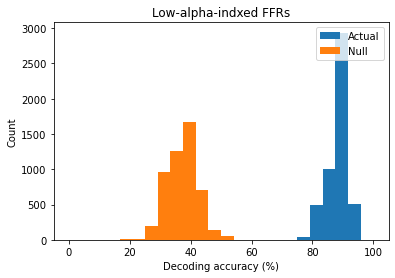

In [8]:
bins = np.linspace(0,100,25)
plt.hist(100*np.array(lo_acc), bins, label='Actual')
plt.hist(100*np.array(null_lo_acc), bins, label='Null')
plt.legend(loc='upper right')
plt.title('Low-alpha-indxed FFRs')
plt.ylabel('Count')
plt.xlabel('Decoding accuracy (%)')
plt.show()

#plt.savefig(figpath+'Lo_MLacc_na.pdf')

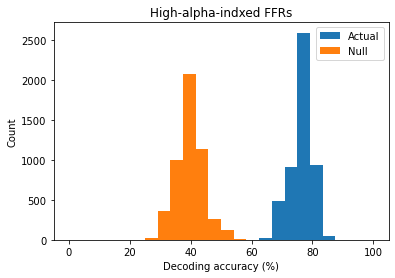

In [9]:
bins = np.linspace(0,100,25)
plt.hist(100*np.array(hi_acc), bins, label='Actual')
plt.hist(100*np.array(null_hi_acc), bins, label='Null')
plt.legend(loc='upper right')
plt.title('High-alpha-indxed FFRs')
plt.ylabel('Count')
plt.xlabel('Decoding accuracy (%)')
plt.show()

#plt.savefig(figpath+'Hi_MLacc_na.pdf')

In [10]:
# boxplot
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [11]:
data1=[np.array(null_lo_acc)*100,np.array(null_hi_acc)*100]
data2=[np.array(lo_acc)*100,np.array(hi_acc)*100]

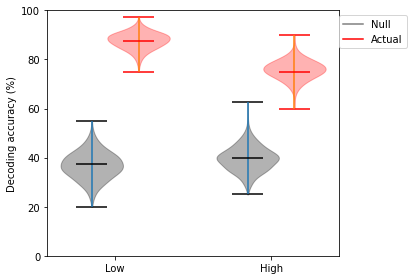

In [13]:
labels=['Low','High']
x=np.arange(len(labels))
width=0.4

plt.figure()
bp1 = plt.violinplot(data1, positions=x - 0.15,widths=width,points=1000,showextrema=True, showmedians=True,bw_method=0.5)
bp2 = plt.violinplot(data2, positions=x + 0.15,widths=width,points=1000,showextrema=True, showmedians=True,bw_method=0.5)

for v in bp1['bodies']:
    v.set_color('black')
    v.set_edgecolor('black')
bp1['cmins'].set_color('black')
bp1['cmaxes'].set_color('black')
bp1['cmedians'].set_color('black')
    
for v in bp2['bodies']:
    v.set_color('red')
    v.set_edgecolor('red')
bp2['cmins'].set_color('red')
bp2['cmaxes'].set_color('red')
bp2['cmedians'].set_color('red')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], 'gray', label='Null')
plt.plot([], 'red', label='Actual')
plt.legend()

plt.ylabel('Decoding accuracy (%)')
plt.ylim([0,100])
plt.xticks(x,labels)
plt.legend(bbox_to_anchor=(1.25, 1))
plt.tight_layout()

#plt.savefig(figpath+'violinplot_MLacc_na.pdf')

In [69]:
#null_lo_df=pd.dataFrame

In [70]:
lo_acc_mean=mean(lo_acc)
hi_acc_mean=mean(hi_acc)
print(lo_acc_mean)
print(hi_acc_mean)

0.876635
0.758205


In [71]:
# p calculation
lo_acc_med=np.median(lo_acc)
a=null_lo_acc>lo_acc_med
lo_a=a.sum()
lo_p=(lo_a+1)/(5000+1)
lo_p

0.0001999600079984003

In [72]:
hi_acc_med=np.median(hi_acc)
a=null_hi_acc>hi_acc_med
hi_a=a.sum()
hi_p=(hi_a+1)/(5000+1)
hi_p

0.0001999600079984003

In [73]:
# p for lo vs hi
a=hi_acc>lo_acc_med
a_no=a.sum()
p=(a_no+1)/(5000+1)
p

0.0003999200159968006

In [ ]:
import statistics as st
import math
lo_var=st.variance(np.array(lo_acc+null_lo_acc).T)
lo_var

In [ ]:
hi_var=st.variance(np.array(hi_acc+null_hi_acc).T)

In [ ]:
lo_dprime = (mean(lo_acc)-mean(null_lo_acc))/math.sqrt(lo_var)
hi_dprime = (mean(hi_acc)-mean(null_hi_acc))/math.sqrt(hi_var)
print(lo_dprime)
print(hi_dprime)

## Test

In [118]:
data=hi_df
subgroup=partition(sub_list,4)
scores=[]
for n in range(len(subgroup)):
    cv_id=subgroup[n]
    #print(cv_id)
    #data[idcolumn] = data[idcolumn].apply(str)
    data_filt=data[~data.index.isin(cv_id)]
    data_cv=data[data.index.isin(cv_id)]
     
        # Train data 
    X_train = data_filt.drop(columns=['Token'])
        #X_train= np.array(X_train) #Re-format as numpy array for input into model
    Y_train = data_filt['Token'] #Outcome variable here
    
        # Test data 
    x_test = data_cv.drop(columns=['Token'])
        #x_test= np.array(x_test) #Re-format as numpy array for input into model
    y_test = data_cv['Token'] #Outcome variable here
    
        # SVM
    clf = svm.SVC(kernel='linear', C=1,tol=1e-3, decision_function_shape='ovo',random_state=1)
        # Train the model on training data
    clf.fit(X_train, Y_train)
        # predict
    y_pred=clf.predict(x_test)
    print(y_pred)
        # accuracy
    acc=clf.score(x_test, y_test)
    scores.append(acc)
        # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

print(mean(scores))

[3 3 3 3 3 3 3 3 3 1 3 3 3 3 3]
[[1 0 4]
 [0 0 5]
 [0 0 5]]
[3 3 3 3 3 3 1 3 3 3 2 3 1 3 3]
[[2 0 3]
 [0 1 4]
 [0 0 5]]
[1 3 3 1 3 1 1 2 3 1 1 3 1 3 3]
[[5 0 0]
 [1 1 3]
 [1 0 4]]
[3 3 3 3 3 3 3 3 3 3 2 3 3 3 3]
[[0 0 5]
 [0 1 4]
 [0 0 5]]
0.5


## Statistical analysis

In [76]:
len(lo_cm)

5000

In [83]:
# accuracy for each token (aa vs ee)
iter_no=len(lo_cm)
lo_aa_acc=[]
lo_ee_acc=[]
hi_aa_acc=[]
hi_ee_acc=[]
for iter in range(iter_no):
    lo_aa_acc.append(lo_cm[iter][0][0])
    lo_ee_acc.append(lo_cm[iter][1][1])
    
    hi_aa_acc.append(hi_cm[iter][0][0])
    hi_ee_acc.append(hi_cm[iter][1][1])

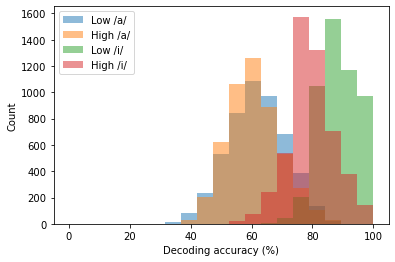

In [79]:
bins = np.linspace(0,100,20)
plt.hist(100*np.array(lo_aa_acc), bins, alpha=0.5,label='Low /a/')
plt.hist(100*np.array(hi_aa_acc), bins, alpha=0.5,label='High /a/')
plt.hist(100*np.array(lo_ee_acc), bins, alpha=0.5,label='Low /i/')
plt.hist(100*np.array(hi_ee_acc), bins, alpha=0.5,label='High /i/')
plt.legend(loc='upper left')
#plt.title('Accuracy for /a/')
plt.ylabel('Count')
plt.xlabel('Decoding accuracy (%)')
plt.show()

In [87]:
lo_aa_df=pd.DataFrame(lo_aa_acc,columns=['Acc'])
lo_aa_df['Token']='a'
lo_aa_df['Alpha']='low'
lo_ee_df=pd.DataFrame(lo_ee_acc,columns=['Acc'])
lo_ee_df['Token']='i'
lo_ee_df['Alpha']='low'

In [88]:
hi_aa_df=pd.DataFrame(hi_aa_acc,columns=['Acc'])
hi_aa_df['Token']='a'
hi_aa_df['Alpha']='hi'
hi_ee_df=pd.DataFrame(hi_ee_acc,columns=['Acc'])
hi_ee_df['Token']='i'
hi_ee_df['Alpha']='hi'

In [89]:
data=pd.concat([lo_aa_df,lo_ee_df,hi_aa_df,hi_ee_df])

In [104]:
data['Acc']=data['Acc']*100

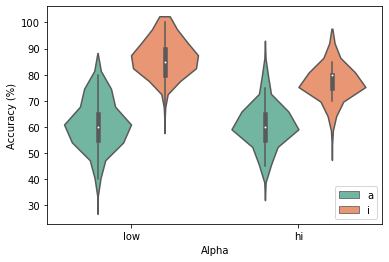

In [126]:
sns.violinplot(x='Alpha', y='Acc', hue='Token',data=data, palette='Set2',scale='count',gridsize=10)
plt.legend(loc='lower right')
plt.ylabel('Accuracy (%)')
plt.savefig(figpath+'violinplot_aheeacc_na.pdf')

In [133]:
common_var=st.variance(np.array(lo_aa_acc+lo_ee_acc+hi_aa_acc+hi_ee_acc).T)
common_var

0.01893175003125156

In [134]:
# D-prime calculation
lo_ahee_var=st.variance(np.array(lo_aa_acc+lo_ee_acc).T)
lo_ahee_dprime = abs(mean(lo_aa_acc)-mean(lo_ee_acc))/math.sqrt(common_var)
lo_ahee_dprime

1.8667415291975542

In [135]:
hi_ahee_var=st.variance(np.array(hi_aa_acc+hi_ee_acc).T)
hi_ahee_dprime = abs(mean(hi_aa_acc)-mean(hi_ee_acc))/math.sqrt(common_var)
hi_ahee_dprime

1.2917836846391797

In [131]:
math.sqrt(lo_ahee_var)

0.1508470028102172

In [132]:
math.sqrt(hi_ahee_var)

0.11813677975073211